# Leitura dos dados

In [1]:
import time

In [2]:
%%time
#============================================================================================#
#                                    IMPORTA BIBLIOTECAS
#============================================================================================#
import pandas as pd
import glob
import numpy as np

#============================================================================================#
#                                    DADOS DE 2003-2023
#============================================================================================#
# cria uma tabela (conhecida também com o nome em inglês de "dataframe") vazia
df_2003_a_2023 = pd.DataFrame()

# lista os arquivos mensais do ano atual
files = sorted(glob.glob('output/01_focos_raw/focos_br_ref_*')) # focos_br_ref_2004.zip

# loop de cada arquivo da lista files
for file in files:

    # leitura da tabela
    df0 = pd.read_csv(file, compression='zip')

    # junta a tabela que foi lida com a anterior
    df_2003_a_2023 = pd.concat([df_2003_a_2023, df0], ignore_index=True)

# remove colunas
df_2003_a_2023.drop(['id_bdq','foco_id','pais'], axis=1, inplace=True)

# renomeia coluna
df_2003_a_2023.rename(columns={'data_pas': 'data'}, inplace=True)

# reposiciona as colunas
df_2003_a_2023 = df_2003_a_2023[['data','lat','lon','municipio','estado','bioma']]

#============================================================================================#
#                                    DADOS DE 2024
#============================================================================================#
# cria uma tabela
df_2024 = pd.DataFrame()

# lista os arquivos mensais do ano atual
files = sorted(glob.glob('output/01_focos_raw/focos_mensal_br_*csv')) # focos_mensal_br_202401.csv

# loop de cada arquivo da lista files
for file in files:

    # leitura da tabela
    df0 = pd.read_csv(file, usecols=['lat', 'lon', 'data_hora_gmt', 'satelite', 'municipio', 'estado', 'bioma'])

    # junta a tabela que foi lida com a anterior
    df_2024 = pd.concat([df_2024, df0], ignore_index=True)

# seleciona apenas para MG e para o satélite de referência AQUA_M-T
df_2024 = df_2024[ df_2024['satelite']=='AQUA_M-T' ]

# remove colunas
df_2024.drop(['satelite'], axis=1, inplace=True)

# renomeia coluna
df_2024.rename(columns={'data_hora_gmt': 'data'}, inplace=True)

# reposiciona as colunas
df_2024 = df_2024[['data','lat','lon','municipio','estado','bioma']]

#============================================================================================#
#                         JUNTA OS ARQUIVOS 2003-2023 E 2024
#============================================================================================#
# junta os dataframes
df_total = pd.concat([df_2003_a_2023, df_2024], ignore_index=True)

# transforma a coluna "datahora" para o formato "datetime"
df_total['data'] = pd.to_datetime(df_total['data'])

# seta a coluna "datahora" como o índice da tabela
df_total.set_index('data', inplace=True)

# ordena a tabela pelo índice
df_total.sort_index(inplace=True)

# mostra o dataframe final
df_total

CPU times: total: 1min 2s
Wall time: 1min 5s


,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.82900,-40.13300,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.62100,-41.66500,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.27600,-41.51400,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.11100,-36.50500,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.88600,-37.81500,ESPLANADA,BAHIA,Mata Atlântica
...,...,...,...,...,...
2024-12-31 17:53:00,-0.30758,-51.71391,MAZAGÃO,AMAPÁ,Amazônia
2024-12-31 17:53:00,-1.21053,-52.02901,ALMEIRIM,PARÁ,Amazônia
2024-12-31 17:53:00,-2.27447,-54.47422,SANTARÉM,PARÁ,Amazônia


In [3]:
df_2003_a_2023.head()

,data,lat,lon,municipio,estado,bioma
0,2003-05-15 17:05:00,-18.518,-55.028,RIO VERDE DE MATO GROSSO,MATO GROSSO DO SUL,Cerrado
1,2003-05-15 17:05:00,-17.542,-48.815,PIRACANJUBA,GOIÁS,Cerrado
2,2003-05-15 17:05:00,-17.612,-47.160,GUARDA-MOR,MINAS GERAIS,Cerrado
3,2003-05-15 17:05:00,-18.386,-51.919,SERRANÓPOLIS,GOIÁS,Cerrado
4,2003-05-15 17:05:00,-17.877,-49.098,MORRINHOS,GOIÁS,Cerrado


In [4]:
df_2024.head()

,data,lat,lon,municipio,estado,bioma
403,2024-01-01 16:24:00,-12.53837,-41.51642,PALMEIRAS,BAHIA,Caatinga
404,2024-01-01 16:24:00,-12.53544,-41.49259,PALMEIRAS,BAHIA,Caatinga
405,2024-01-01 16:24:00,-7.09835,-42.18570,OEIRAS,PIAUÍ,Caatinga
406,2024-01-01 16:24:00,-12.54596,-41.50789,PALMEIRAS,BAHIA,Caatinga
407,2024-01-01 16:24:00,-12.54324,-41.48442,PALMEIRAS,BAHIA,Caatinga


# `FIGURA FINAL:` Série temporal dos focos por ano para o Brasil e SP

## OPÇÃO-1 - `USAR ESTE`

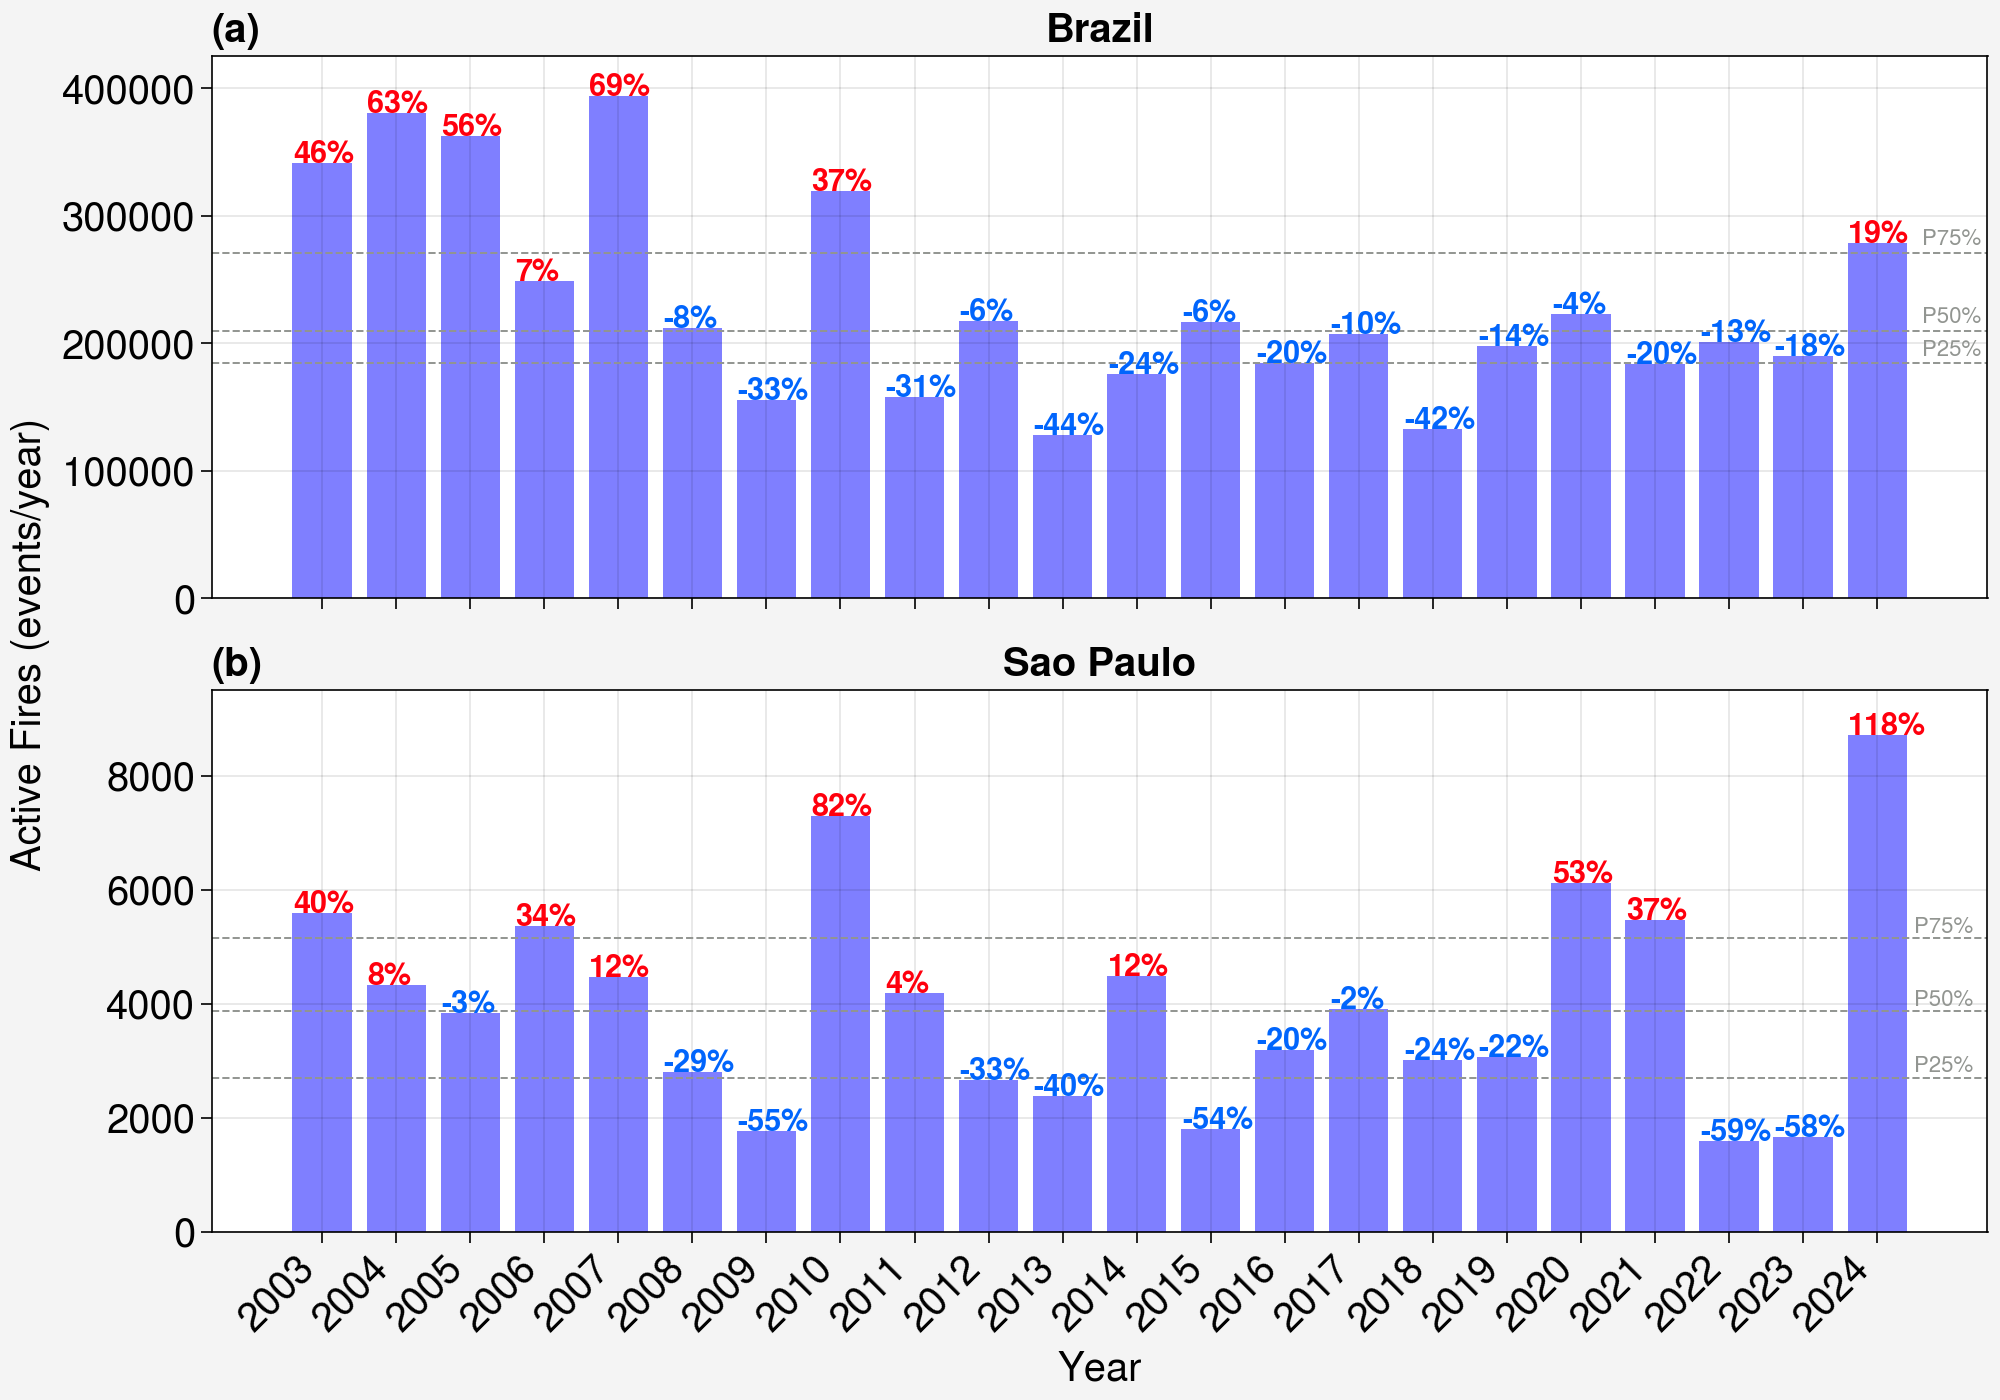

In [10]:
#===================================================================================#
#                            IMPORTA BILIOTECAS
#===================================================================================#
import proplot as pplt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#===================================================================================#
#                                    CÁLCULOS
#===================================================================================#
# calculando a anual total - BR
anual_br = df_total.groupby(pd.Grouper(freq='1Y')).count()['lat']

# calculando a anual total - SP
# seleciona os focos para um determinado Estado
df_total_sp = df_total[ df_total['estado'] == 'SÃO PAULO' ]

# calculando a anual total
anual_sp = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

#===================================================================================#
#                            PLOTA GRÁFICO
#===================================================================================#
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10,7), tight=True, ncols=1, nrows=2, abc=True, abcstyle='(a)', abcsize=5)

#-------------------------------#
#           BRASIL
#-------------------------------#
# gráfico
ax[0].bar(anual_br.index.year,
          anual_br.values,
          color='blue',
          alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias_br = ((anual_br.values - np.mean(anual_br.values)) / np.mean(anual_br.values)) * 100.

for ano_br, focos_br, anomalia_br in zip(anual_br.index.year, anual_br.values, anomalias_br):
    val_br = f'{str(int(anomalia_br))}%'
    if anomalia_br > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[0].text(ano_br-0.39, focos_br, val_br, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax[0].format(title='Brazil',
             titleloc='c',
             titleweight='bold',
             titlecolor='black',          
             xlabel='Year',
             ylabel='Active Fires (events/year)',          
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=pplt.arange(2003,2024,1),
             xrotation=45, ylim=(0,425000))

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual_br.values, 25)
p50 = np.percentile(anual_br.values, 50)
p75 = np.percentile(anual_br.values, 75)
ax[0].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[0].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[0].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[0].text(2024.6, p25+6000, 'P25%', color='gray', fontsize=8)
ax[0].text(2024.6, p50+6000, 'P50%', color='gray', fontsize=8)
ax[0].text(2024.6, p75+6000, 'P75%', color='gray', fontsize=8)

# legenda dos desastres e radares
#ax[0].legend(loc='ur', ncols=1, frameon=False, prop={'size': 12.5}, markerscale=1.2)

#-------------------------------#
#         SÃO PAULO
#-------------------------------#
# gráfico
ax[1].bar(anual_sp.index.year,
          anual_sp.values,
          color='blue',
          alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias_sp = ((anual_sp.values - np.mean(anual_sp.values)) / np.mean(anual_sp.values)) * 100.
for ano_sp, focos_sp, anomalia_sp in zip(anual_sp.index.year, anual_sp.values, anomalias_sp):
    val_sp = f'{str(int(anomalia_sp))}%'
    if anomalia_sp > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[1].text(ano_sp-0.39, focos_sp, val_sp, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax[1].format(title='Sao Paulo',
             titleloc='c',
             titleweight='bold',
             titlecolor='black',          
             xlabel='Year',
             ylabel=' Active Fires  (events/year)',          
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=pplt.arange(2003,2024,1),
             xrotation=45, ylim=(0,9500))

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual_sp.values, 25)
p50 = np.percentile(anual_sp.values, 50)
p75 = np.percentile(anual_sp.values, 75)
ax[1].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[1].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[1].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[1].text(2024.5, p25+100, 'P25%', color='gray', fontsize=8)
ax[1].text(2024.5, p50+100, 'P50%', color='gray', fontsize=8)
ax[1].text(2024.5, p75+100, 'P75%', color='gray', fontsize=8)
#-------------------------------#

# salva figura
fig.save(f'output/Fig_1_serie_anual_brasil_e_SP.jpg', dpi=300)

# exibe figura na tela
pplt.show()

## OPÇÃO-2 

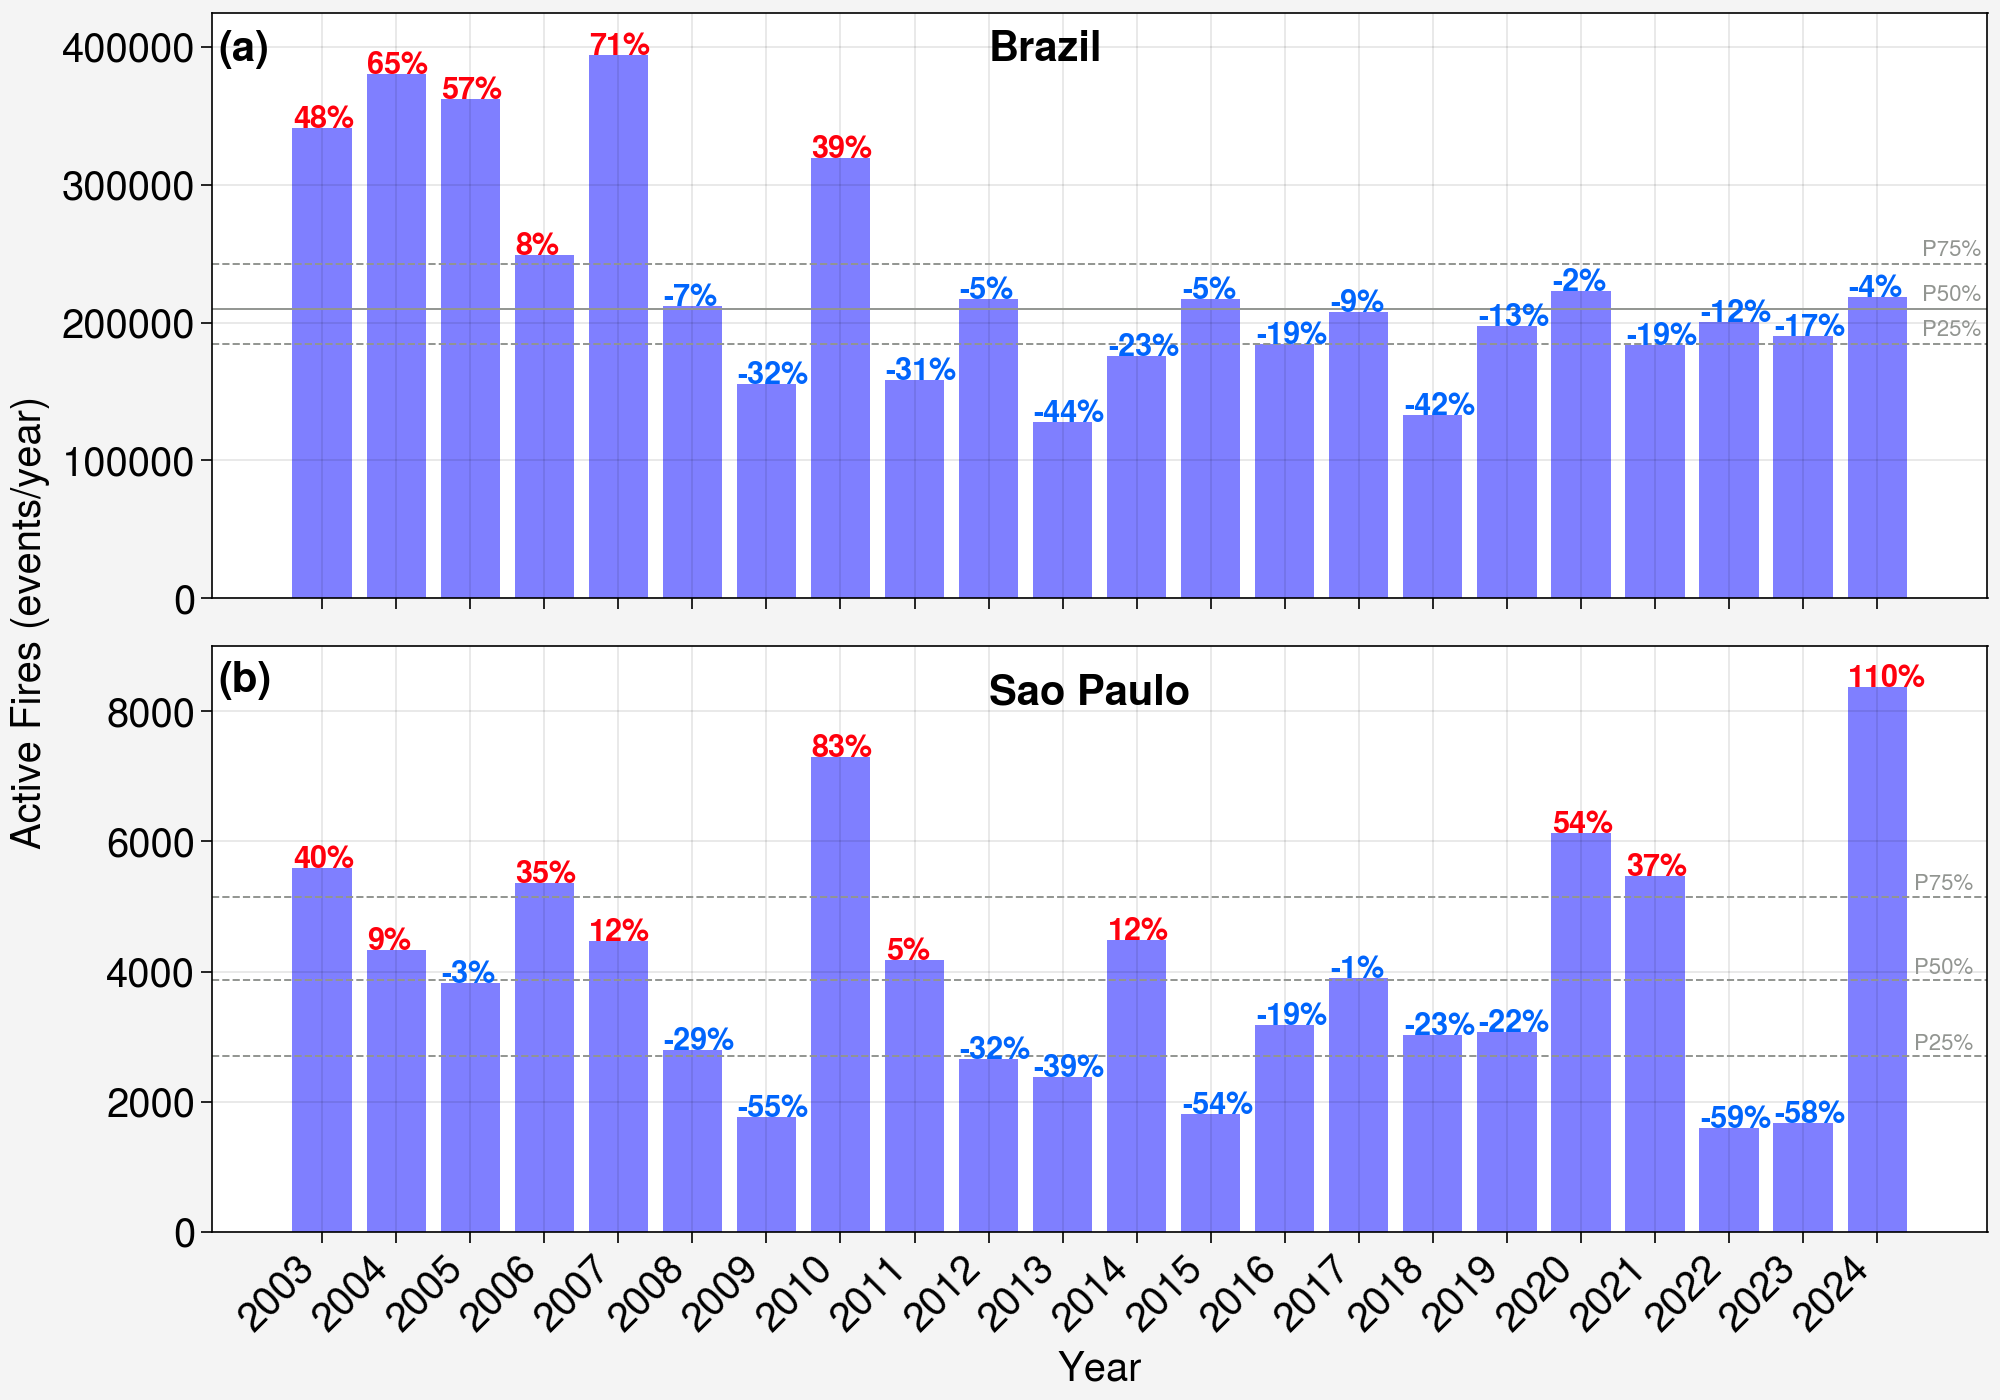

In [53]:
#===================================================================================#
#                            IMPORTA BILIOTECAS
#===================================================================================#
import proplot as pplt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#===================================================================================#
#                                    CÁLCULOS
#===================================================================================#
# calculando a anual total - BR
anual_br = df_total.groupby(pd.Grouper(freq='1Y')).count()['lat']

# calculando a anual total - SP
# seleciona os focos para um determinado Estado
df_total_sp = df_total[ df_total['estado'] == 'SÃO PAULO' ]

# calculando a anual total
anual_sp = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

#===================================================================================#
#                            PLOTA GRÁFICO
#===================================================================================#
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10,7), tight=True, ncols=1, nrows=2, abc=False)

#-------------------------------#
#           BRASIL
#-------------------------------#
# gráfico
ax[0].bar(anual_br.index.year,
          anual_br.values,
          color='blue',
          alpha=0.5)

# label da figura
ax[0].text(2003-1.4, 390000, '(a)', color='black', fontsize=15, weight='bold')
ax[0].text(2013-1.0, 390000, 'Brazil', color='black', fontsize=15, weight='bold')

# insere os valores de anomalia no topo das barras
anomalias_br = ((anual_br.values - np.mean(anual_br.values)) / np.mean(anual_br.values)) * 100.

for ano_br, focos_br, anomalia_br in zip(anual_br.index.year, anual_br.values, anomalias_br):
    val_br = f'{str(int(anomalia_br))}%'
    if anomalia_br > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[0].text(ano_br-0.39, focos_br, val_br, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax[0].format(xlabel='Year',
             ylabel='Active Fires (events/year)',          
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=pplt.arange(2003,2024,1),
             xrotation=45, ylim=(0,425000))

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual_br.values, 25)
p50 = np.percentile(anual_br.values, 50)
p75 = np.percentile(anual_br.values, 75)
ax[0].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[0].axhline(p50, color='gray', linestyle='-', lw=0.7, label='P50%')
ax[0].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[0].text(2024.6, p25+6000, 'P25%', color='gray', fontsize=8)
ax[0].text(2024.6, p50+6000, 'P50%', color='gray', fontsize=8)
ax[0].text(2024.6, p75+6000, 'P75%', color='gray', fontsize=8)

# legenda dos desastres e radares
#ax[0].legend(loc='ur', ncols=1, frameon=False, prop={'size': 12.5}, markerscale=1.2)

#-------------------------------#
#         SÃO PAULO
#-------------------------------#
# gráfico
ax[1].bar(anual_sp.index.year,
          anual_sp.values,
          color='blue',
          alpha=0.5)

# label da figura
ax[1].text(2003-1.4, 8300, '(b)', color='black', fontsize=15, weight='bold')
ax[1].text(2012, 8100, 'Sao Paulo', color='black', fontsize=15, weight='bold')

# insere os valores de anomalia no topo das barras
anomalias_sp = ((anual_sp.values - np.mean(anual_sp.values)) / np.mean(anual_sp.values)) * 100.
for ano_sp, focos_sp, anomalia_sp in zip(anual_sp.index.year, anual_sp.values, anomalias_sp):
    val_sp = f'{str(int(anomalia_sp))}%'
    if anomalia_sp > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[1].text(ano_sp-0.39, focos_sp, val_sp, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax[1].format(xlabel='Year',
             ylabel=' Active Fires  (events/year)',          
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=pplt.arange(2003,2024,1),
             xrotation=45, ylim=(0,9000))

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual_sp.values, 25)
p50 = np.percentile(anual_sp.values, 50)
p75 = np.percentile(anual_sp.values, 75)
ax[1].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[1].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[1].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[1].text(2024.5, p25+100, 'P25%', color='gray', fontsize=8)
ax[1].text(2024.5, p50+100, 'P50%', color='gray', fontsize=8)
ax[1].text(2024.5, p75+100, 'P75%', color='gray', fontsize=8)
#-------------------------------#

# salva figura
fig.save(f'output/Fig_1_serie_anual_brasil_e_SP_2.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# `FIGURA FINAL:` Série temporal dos focos por ano para o Brasil e MG

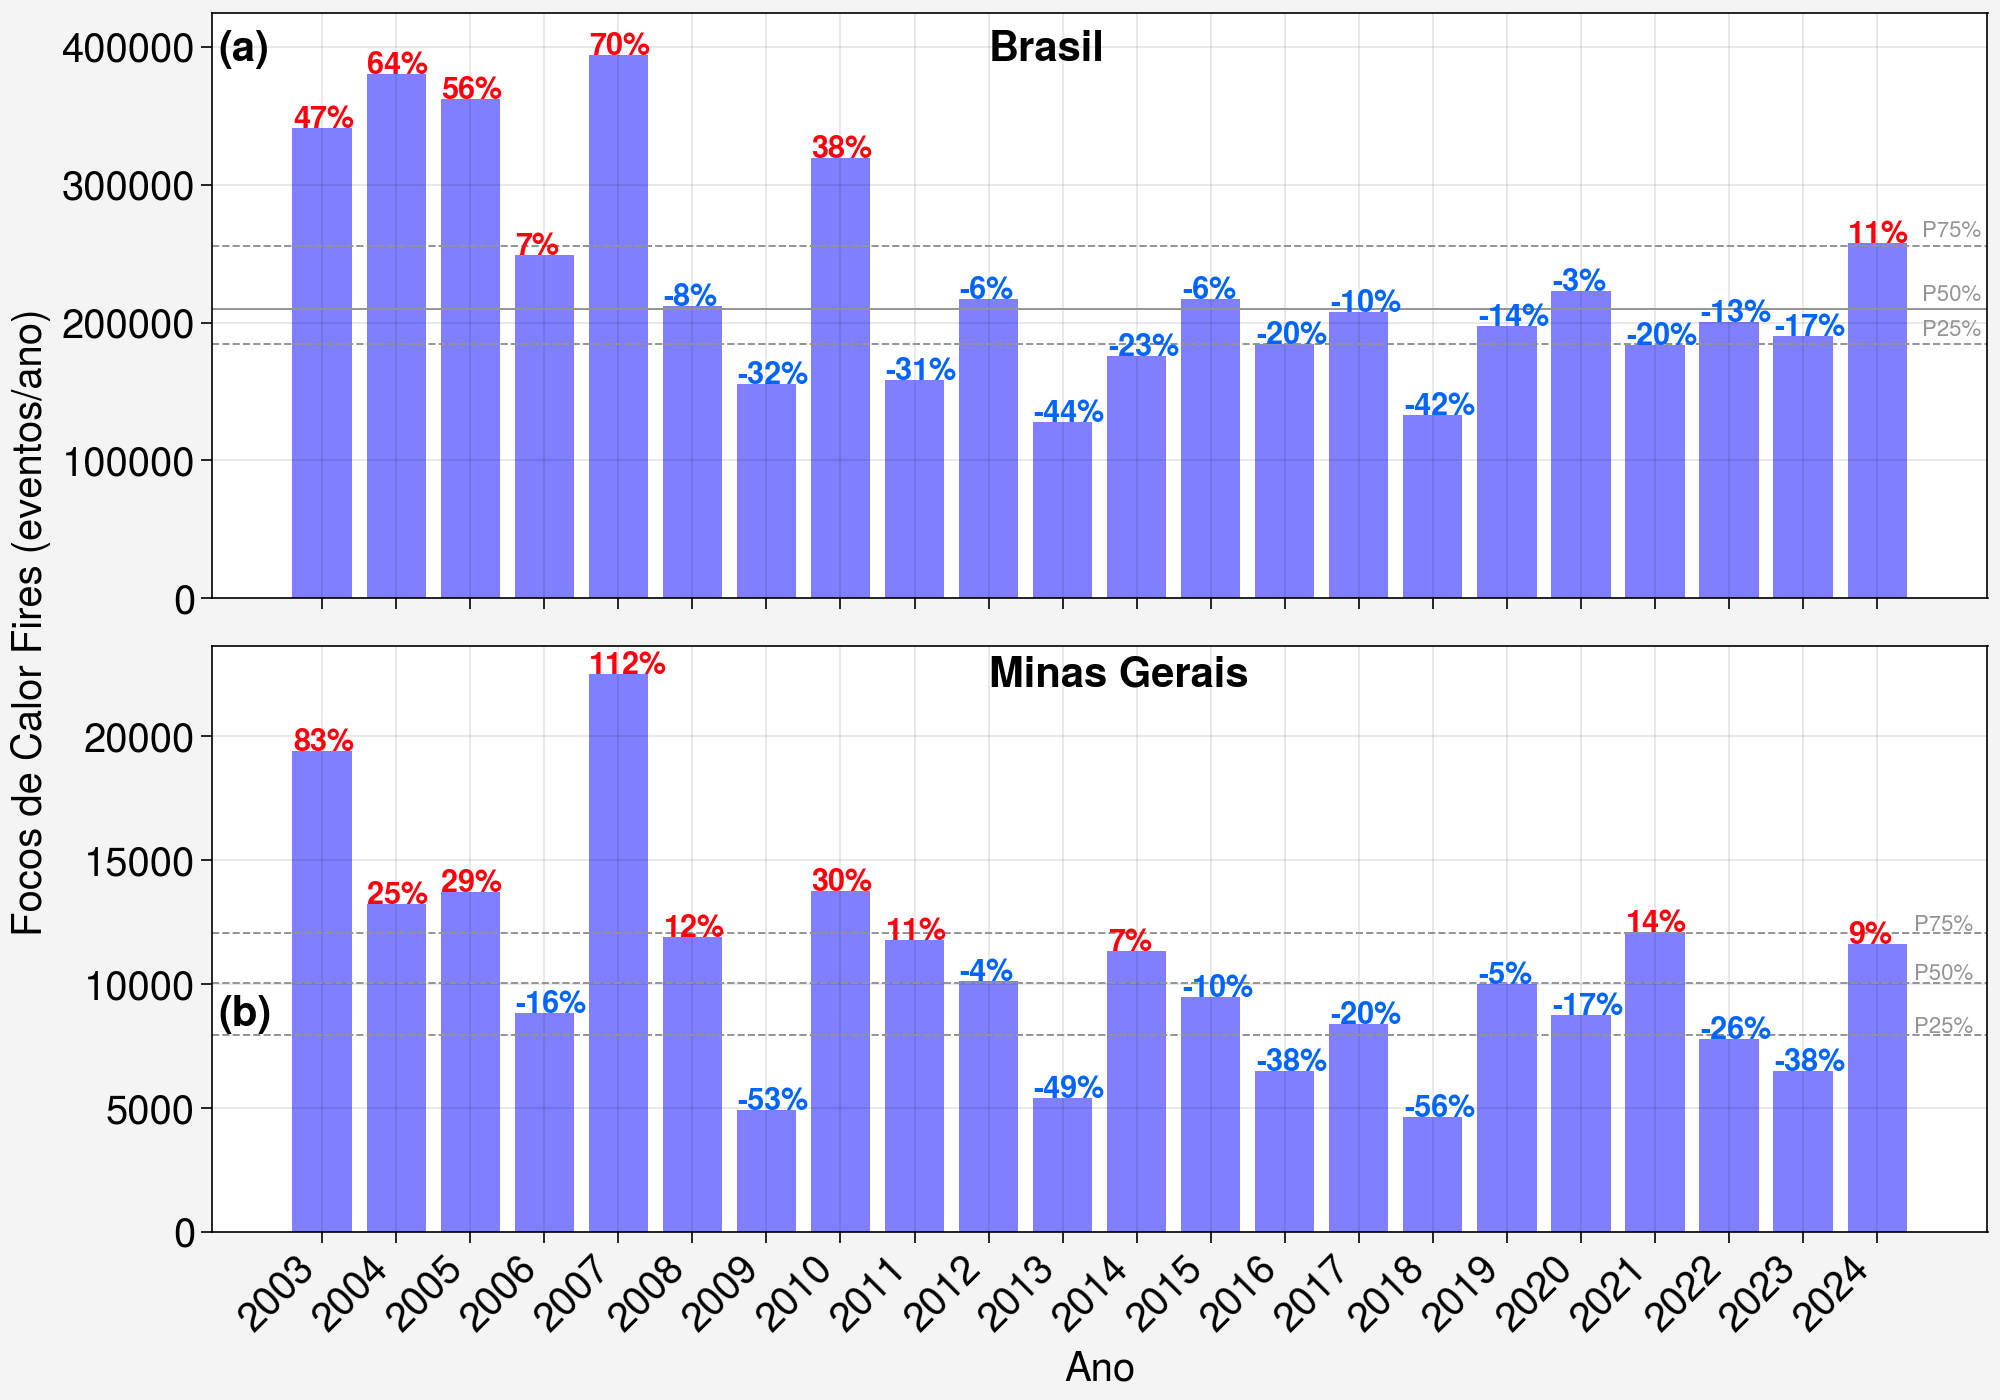

In [10]:
#===================================================================================#
#                            IMPORTA BILIOTECAS
#===================================================================================#
import proplot as pplt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#===================================================================================#
#                                    CÁLCULOS
#===================================================================================#
# calculando a anual total - BR
anual_br = df_total.groupby(pd.Grouper(freq='1Y')).count()['lat']

# calculando a anual total - SP
# seleciona os focos para um determinado Estado
df_total_sp = df_total[ df_total['estado'] == 'MINAS GERAIS' ]

# calculando a anual total
anual_sp = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

#===================================================================================#
#                            PLOTA GRÁFICO
#===================================================================================#
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10,7), tight=True, ncols=1, nrows=2, abc=False)

#-------------------------------#
#           BRASIL
#-------------------------------#
# gráfico
ax[0].bar(anual_br.index.year,
          anual_br.values,
          color='blue',
          alpha=0.5)

# label da figura
ax[0].text(2003-1.4, 390000, '(a)', color='black', fontsize=15, weight='bold')
ax[0].text(2013-1.0, 390000, 'Brasil', color='black', fontsize=15, weight='bold')

# insere os valores de anomalia no topo das barras
anomalias_br = ((anual_br.values - np.mean(anual_br.values)) / np.mean(anual_br.values)) * 100.

for ano_br, focos_br, anomalia_br in zip(anual_br.index.year, anual_br.values, anomalias_br):
    val_br = f'{str(int(anomalia_br))}%'
    if anomalia_br > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[0].text(ano_br-0.39, focos_br, val_br, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax[0].format(xlabel='Ano',
             ylabel='Focos de Calor Fires (eventos/ano)',          
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=pplt.arange(2003,2024,1),
             xrotation=45, ylim=(0,425000))

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual_br.values, 25)
p50 = np.percentile(anual_br.values, 50)
p75 = np.percentile(anual_br.values, 75)
ax[0].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[0].axhline(p50, color='gray', linestyle='-', lw=0.7, label='P50%')
ax[0].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[0].text(2024.6, p25+6000, 'P25%', color='gray', fontsize=8)
ax[0].text(2024.6, p50+6000, 'P50%', color='gray', fontsize=8)
ax[0].text(2024.6, p75+6000, 'P75%', color='gray', fontsize=8)

# legenda dos desastres e radares
#ax[0].legend(loc='ur', ncols=1, frameon=False, prop={'size': 12.5}, markerscale=1.2)

#-------------------------------#
#         SÃO PAULO
#-------------------------------#
# gráfico
ax[1].bar(anual_sp.index.year,
          anual_sp.values,
          color='blue',
          alpha=0.5)

# label da figura
ax[1].text(2003-1.4, 8300, '(b)', color='black', fontsize=15, weight='bold')
ax[1].text(2012, 22000, 'Minas Gerais', color='black', fontsize=15, weight='bold')

# insere os valores de anomalia no topo das barras
anomalias_sp = ((anual_sp.values - np.mean(anual_sp.values)) / np.mean(anual_sp.values)) * 100.
for ano_sp, focos_sp, anomalia_sp in zip(anual_sp.index.year, anual_sp.values, anomalias_sp):
    val_sp = f'{str(int(anomalia_sp))}%'
    if anomalia_sp > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax[1].text(ano_sp-0.39, focos_sp, val_sp, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax[1].format(xlabel='Ano',
             ylabel='Focos de Calor Fires (eventos/ano)',       
             small='20px',
             large='20px',
             xtickminor=False,
             ytickminor=False,
             xticks=pplt.arange(2003,2024,1),
             xrotation=45)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual_sp.values, 25)
p50 = np.percentile(anual_sp.values, 50)
p75 = np.percentile(anual_sp.values, 75)
ax[1].axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax[1].axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax[1].axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax[1].text(2024.5, p25+100, 'P25%', color='gray', fontsize=8)
ax[1].text(2024.5, p50+100, 'P50%', color='gray', fontsize=8)
ax[1].text(2024.5, p75+100, 'P75%', color='gray', fontsize=8)
#-------------------------------#

# salva figura
fig.save(f'output/Fig_1c_serie_anual_brasil_e_MG.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por ano - `BRASIL`

In [254]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


In [255]:
# calculando a anual total
anual = df_total.groupby(pd.Grouper(freq='1Y')).count()['lat']
anual

data
2003-12-31    341237
2004-12-31    380445
2005-12-31    362563
2006-12-31    249179
2007-12-31    393915
2008-12-31    211933
2009-12-31    155102
2010-12-31    319383
2011-12-31    158099
2012-12-31    217234
2013-12-31    128145
2014-12-31    175892
2015-12-31    216778
2016-12-31    184217
2017-12-31    207508
2018-12-31    132870
2019-12-31    197632
2020-12-31    222797
2021-12-31    184081
2022-12-31    200763
2023-12-31    189901
2024-12-31    218768
Freq: A-DEC, Name: lat, dtype: int64

In [256]:
anual.index.year

Int64Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
           dtype='int64', name='data')

In [257]:
anual.values

array([341237, 380445, 362563, 249179, 393915, 211933, 155102, 319383,
       158099, 217234, 128145, 175892, 216778, 184217, 207508, 132870,
       197632, 222797, 184081, 200763, 189901, 218768], dtype=int64)

In [258]:
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
anomalias

array([ 48.70358023,  65.78956438,  57.99698204,   8.58672834,
        71.65949416,  -7.64425936, -32.40995935,  39.18008764,
       -31.10393266,  -5.33420014, -44.15722712, -23.35013456,
        -5.53291491, -19.72228264,  -9.57257704, -42.09817603,
       -13.87632065,  -2.90996707, -19.78154845, -12.51189971,
       -17.24532044,  -4.66571667])

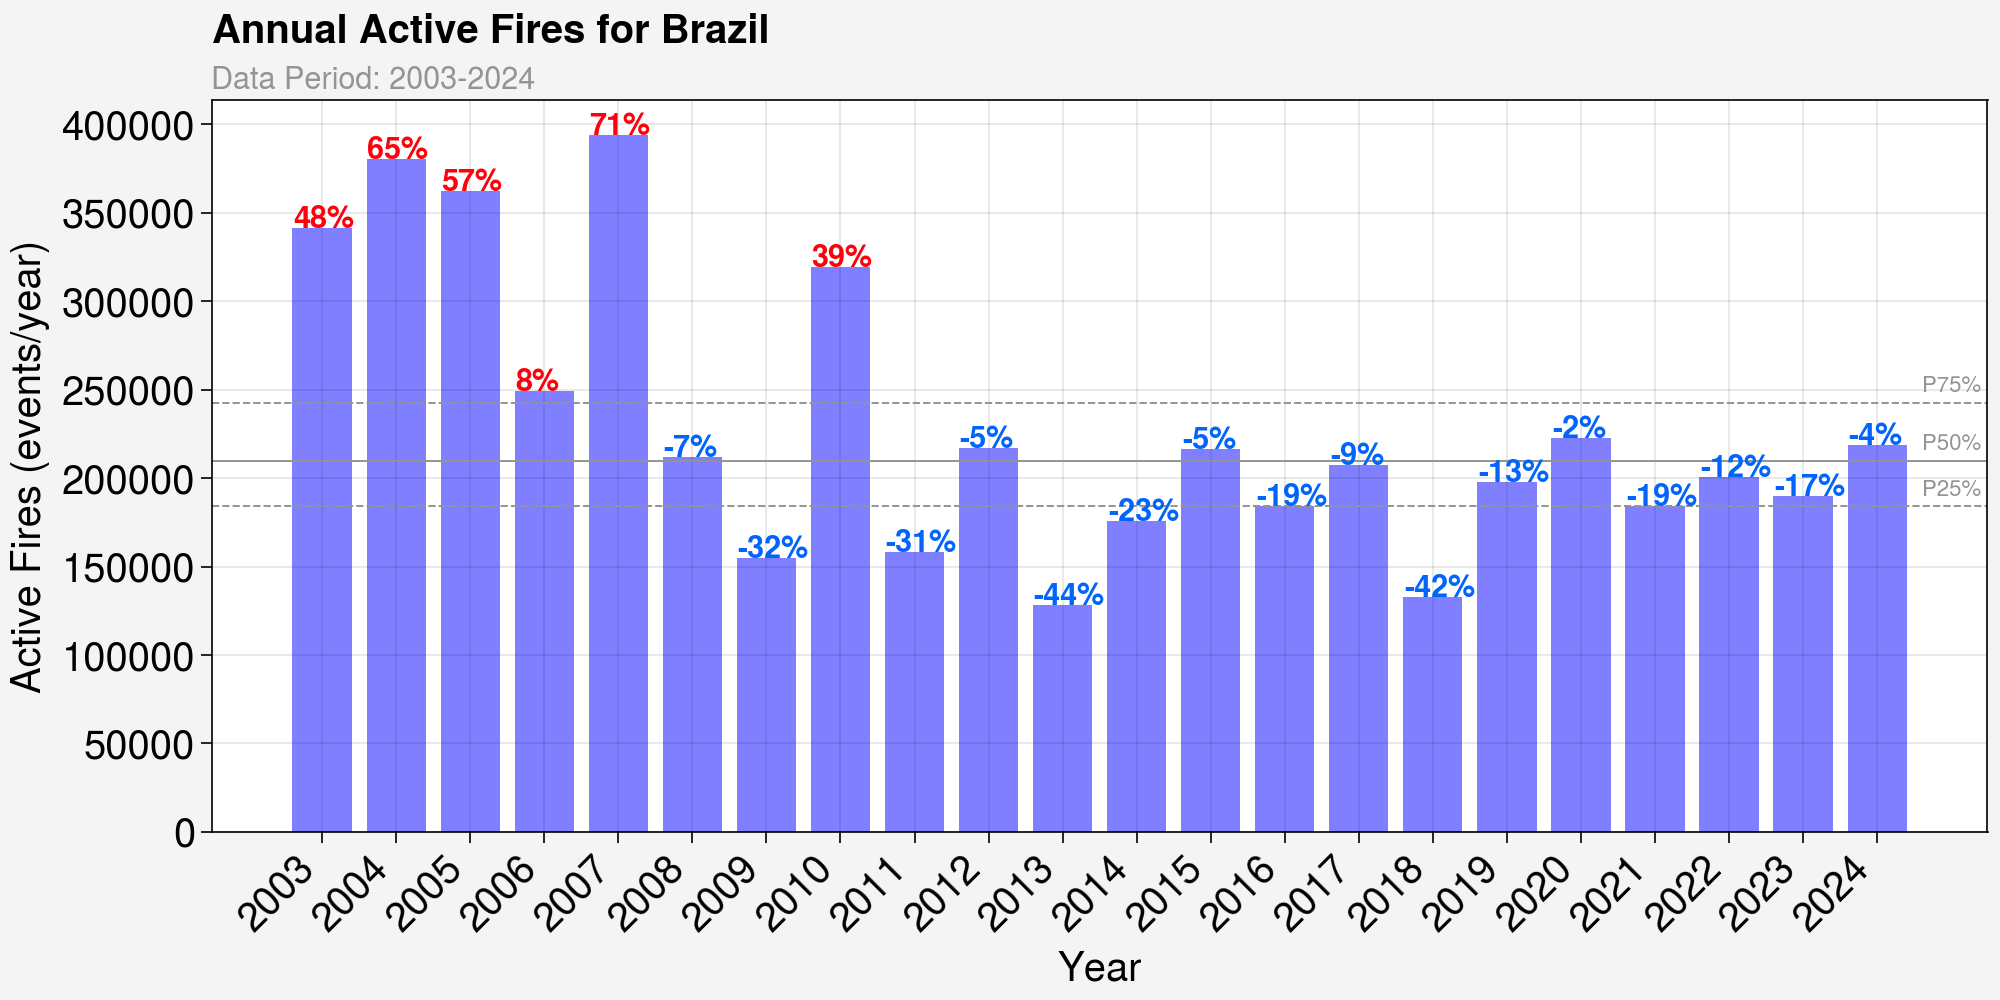

In [259]:
# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
for ano, focos, anomalia in zip(anual.index.year, anual.values, anomalias):
    val = f'{str(int(anomalia))}%'
    if anomalia > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax.text(ano-0.39, focos, val, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax.format(title='Annual Active Fires for Brazil\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year',
          ylabel='Active Fires (events/year)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2003,2024,1),
          xrotation=45)

# plota subtítulo
ax.text(2001.5, 420000, f'Data Period: 2003-2024', color='grey', fontsize=11)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual.values, 25)
p50 = np.percentile(anual.values, 50)
p75 = np.percentile(anual.values, 75)
ax.axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax.axhline(p50, color='gray', linestyle='-', lw=0.7, label='P50%')
ax.axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax.text(2024.6, p25+6000, 'P25%', color='gray', fontsize=8)
ax.text(2024.6, p50+6000, 'P50%', color='gray', fontsize=8)
ax.text(2024.6, p75+6000, 'P75%', color='gray', fontsize=8)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_1_anual_brasil.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por ano - `SÃO PAULO`

In [260]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


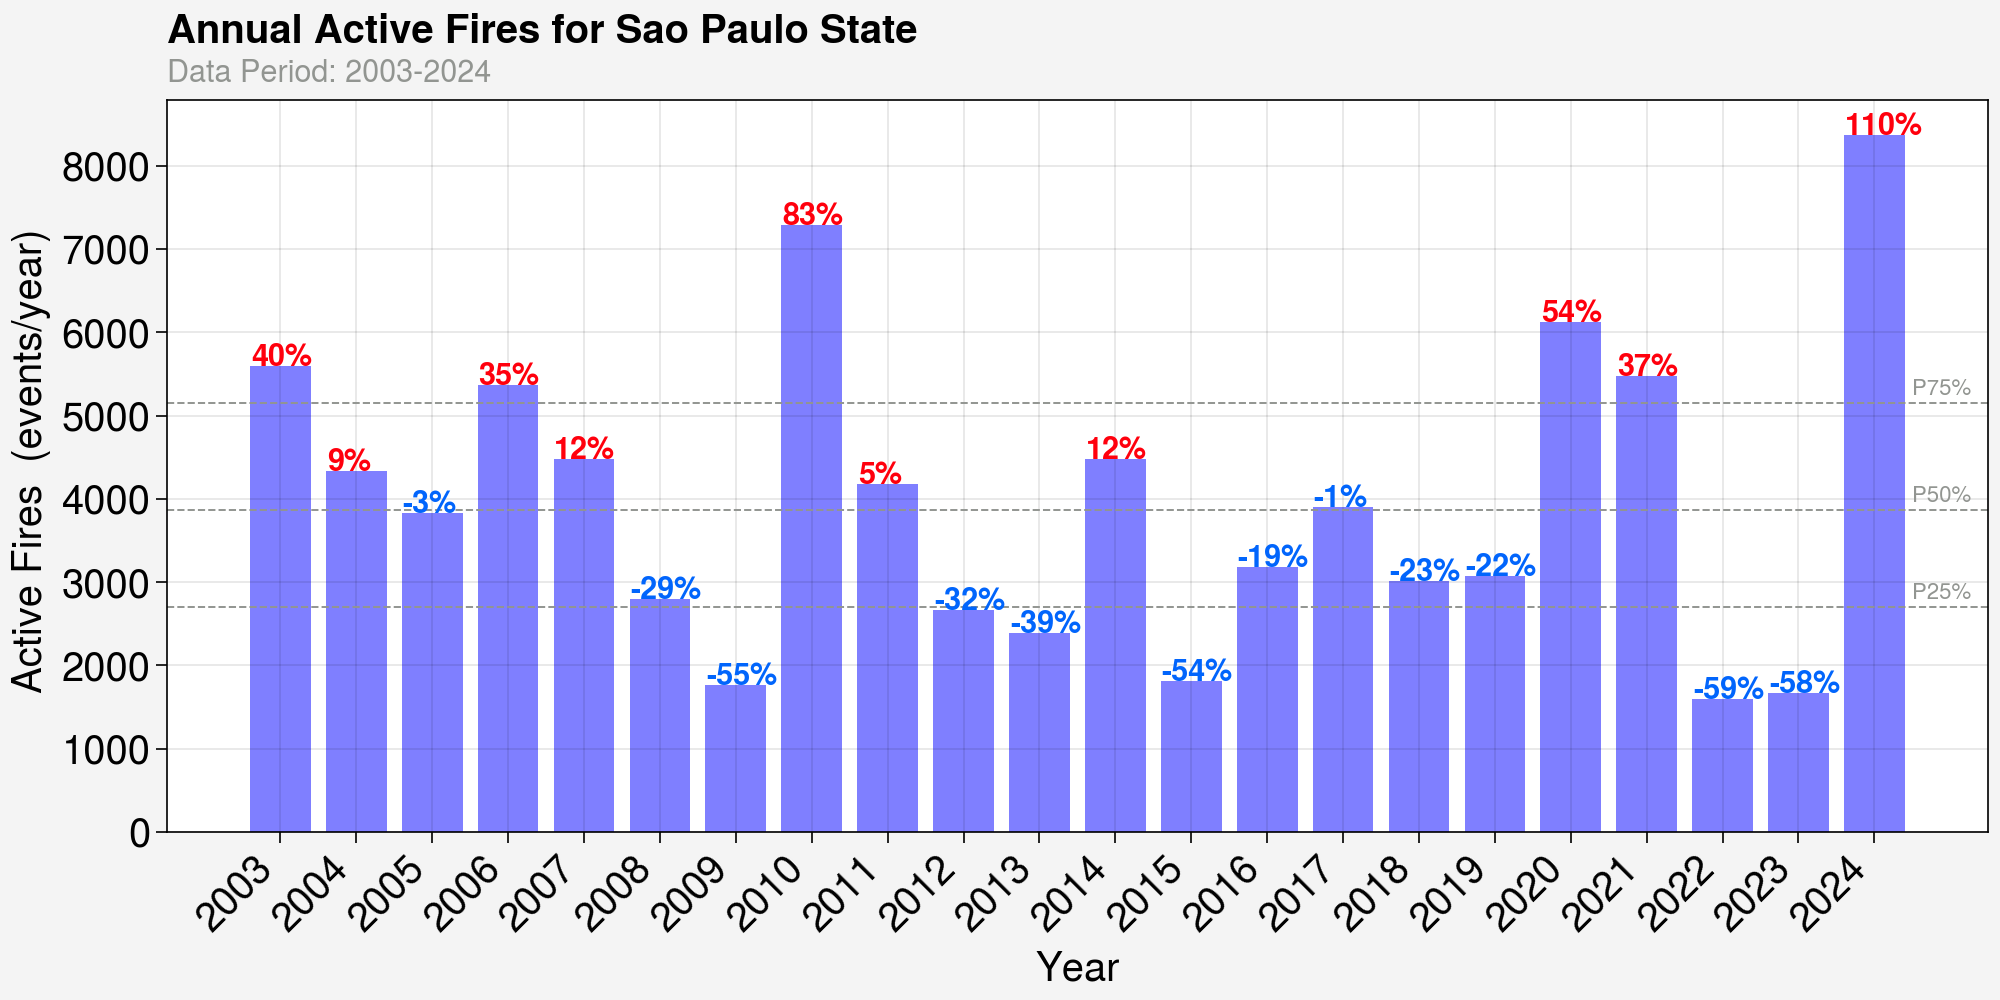

In [261]:
# seleciona os focos para um determinado Estado
df_total_sp = df_total[ df_total['estado'] == 'SÃO PAULO' ]

# calculando a anual total
anual = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
for ano, focos, anomalia in zip(anual.index.year, anual.values, anomalias):
    val = f'{str(int(anomalia))}%'
    if anomalia > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax.text(ano-0.39, focos, val, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax.format(title='Annual Active Fires for Sao Paulo State\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year',
          ylabel=' Active Fires  (events/year)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2003,2024,1),
          xrotation=45)

# plota subtítulo
ax.text(2001.5, 9000, f'Data Period: 2003-2024', color='grey', fontsize=11)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual.values, 25)
p50 = np.percentile(anual.values, 50)
p75 = np.percentile(anual.values, 75)
ax.axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax.axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax.axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax.text(2024.5, p25+100, 'P25%', color='gray', fontsize=8)
ax.text(2024.5, p50+100, 'P50%', color='gray', fontsize=8)
ax.text(2024.5, p75+100, 'P75%', color='gray', fontsize=8)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_2_anual_sp.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por ano - `RIO DE JANEIRO`

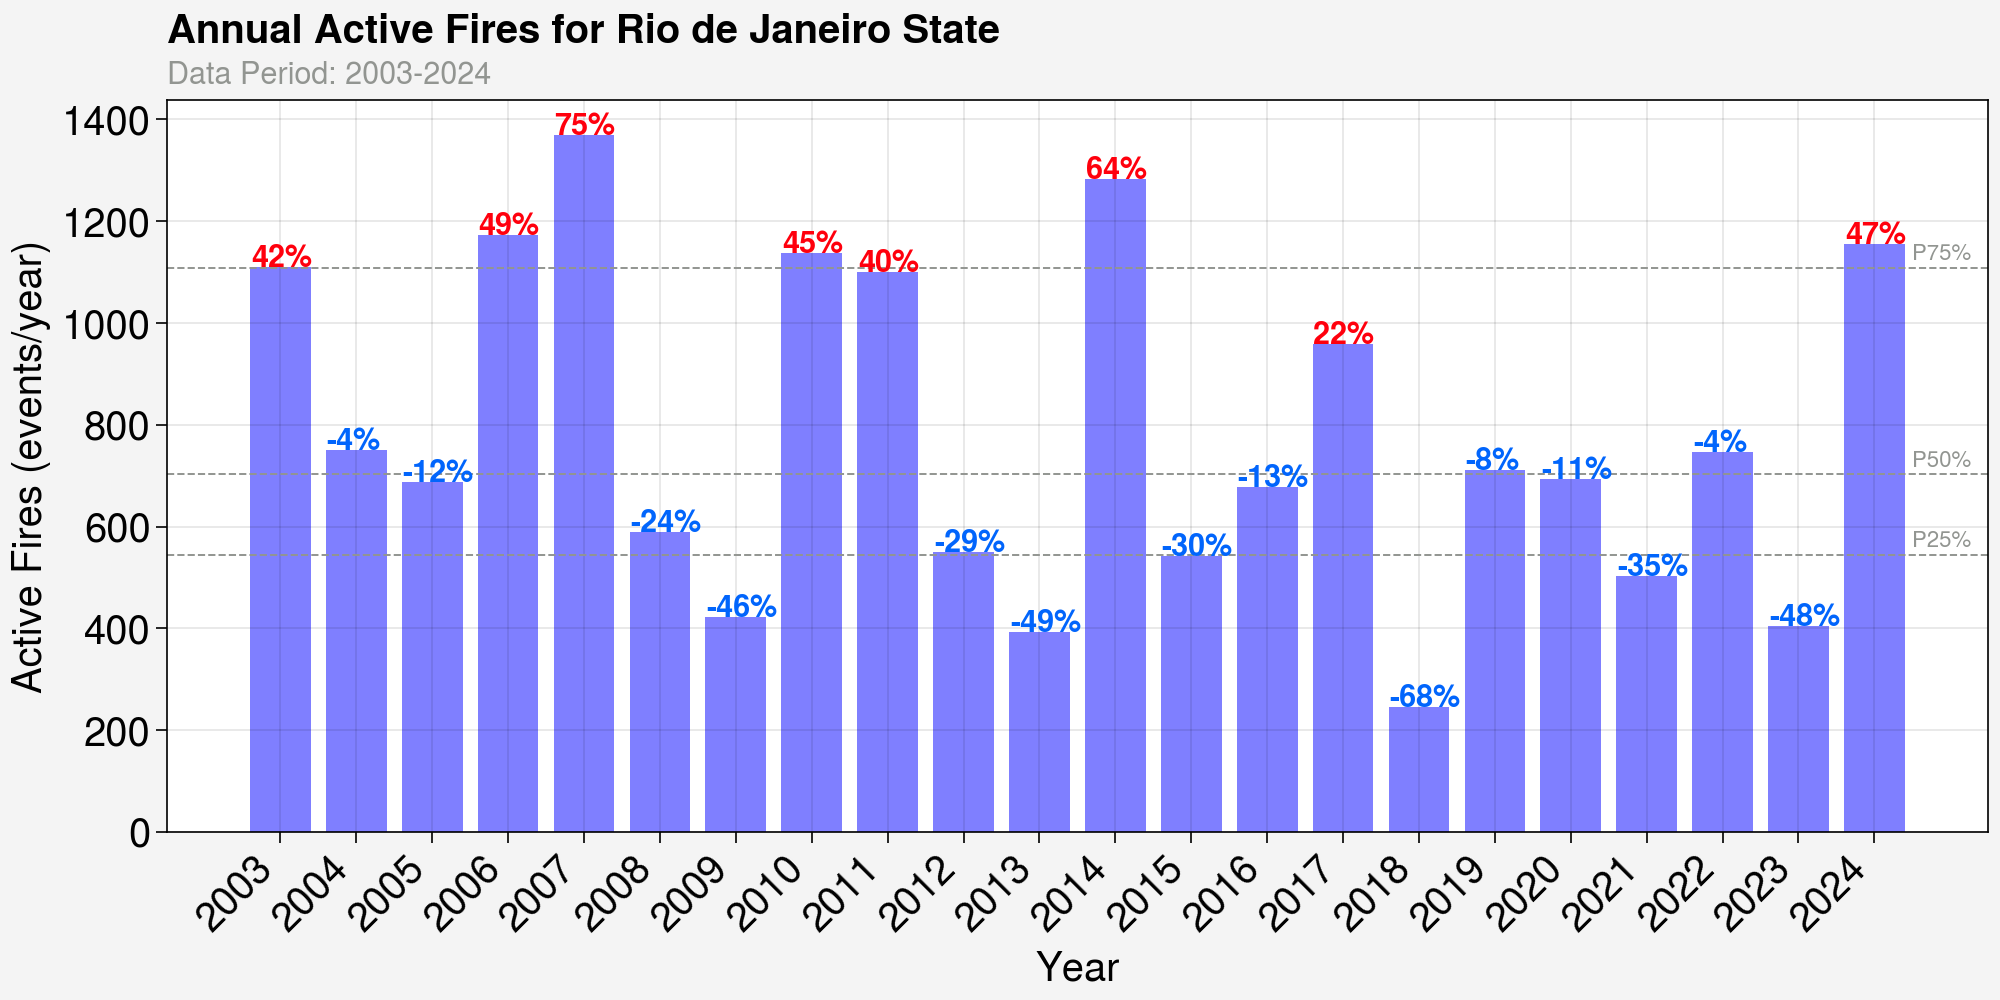

In [262]:
# seleciona os focos para um determinado Estado
df_total_sp = df_total[ df_total['estado'] == 'RIO DE JANEIRO' ]

# calculando a anual total
anual = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
for ano, focos, anomalia in zip(anual.index.year, anual.values, anomalias):
    val = f'{str(int(anomalia))}%'
    if anomalia > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax.text(ano-0.39, focos, val, color=cor, fontsize=11, weight='bold')

# formatação do eixo
ax.format(title='Annual Active Fires for Rio de Janeiro State\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year',
          ylabel='Active Fires (events/year)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2003,2024,1),
          xrotation=45)

# plota subtítulo
ax.text(2001.5, 1470, f'Data Period: 2003-2024', color='grey', fontsize=11)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual.values, 25)
p50 = np.percentile(anual.values, 50)
p75 = np.percentile(anual.values, 75)
ax.axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax.axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax.axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax.text(2024.5, p25+15, 'P25%', color='gray', fontsize=8)
ax.text(2024.5, p50+15, 'P50%', color='gray', fontsize=8)
ax.text(2024.5, p75+15, 'P75%', color='gray', fontsize=8)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_3_anual_rj.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por ano - `MINAS GERAIS`

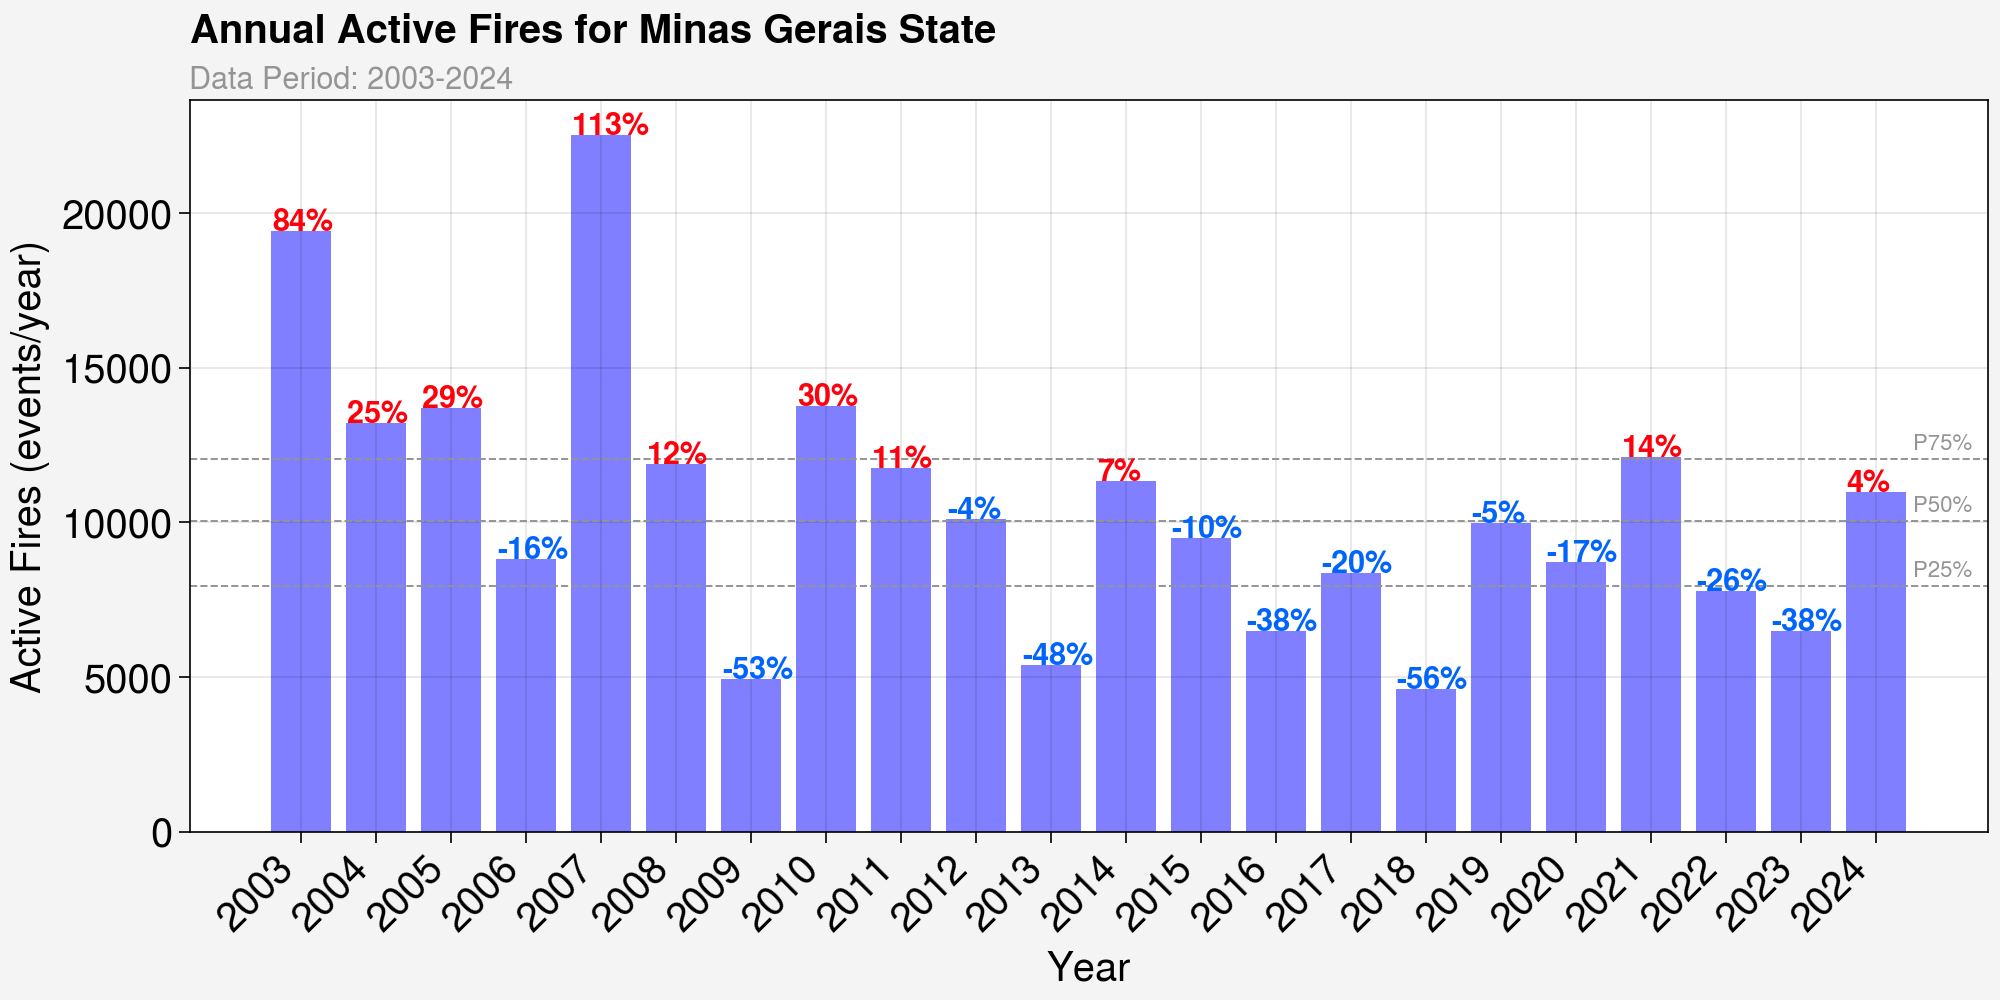

In [263]:
# seleciona os focos para um determinado Estado
df_total_sp = df_total[ df_total['estado'] == 'MINAS GERAIS' ]

# calculando a anual total
anual = df_total_sp.groupby(pd.Grouper(freq='1Y')).count()['lat']

# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
for ano, focos, anomalia in zip(anual.index.year, anual.values, anomalias):
    val = f'{str(int(anomalia))}%'
    if anomalia > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax.text(ano-0.39, focos, val, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax.format(title='Annual Active Fires for Minas Gerais State\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year',
          ylabel='Active Fires (events/year)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2003,2024,1),
          xrotation=45)

# plota subtítulo
ax.text(2001.5, 24000, f'Data Period: 2003-2024', color='gray', fontsize=11)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual.values, 25)
p50 = np.percentile(anual.values, 50)
p75 = np.percentile(anual.values, 75)
ax.axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax.axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax.axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax.text(2024.5, p25+300, 'P25%', color='gray', fontsize=8)
ax.text(2024.5, p50+300, 'P50%', color='gray', fontsize=8)
ax.text(2024.5, p75+300, 'P75%', color='gray', fontsize=8)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_4_anual_mg.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por ano - `PANTANAL`

In [264]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


In [265]:
df_total['bioma'].unique()

array(['Mata Atlântica', 'Caatinga', 'Amazônia', 'Pantanal', 'Cerrado',
       'Pampa', nan], dtype=object)

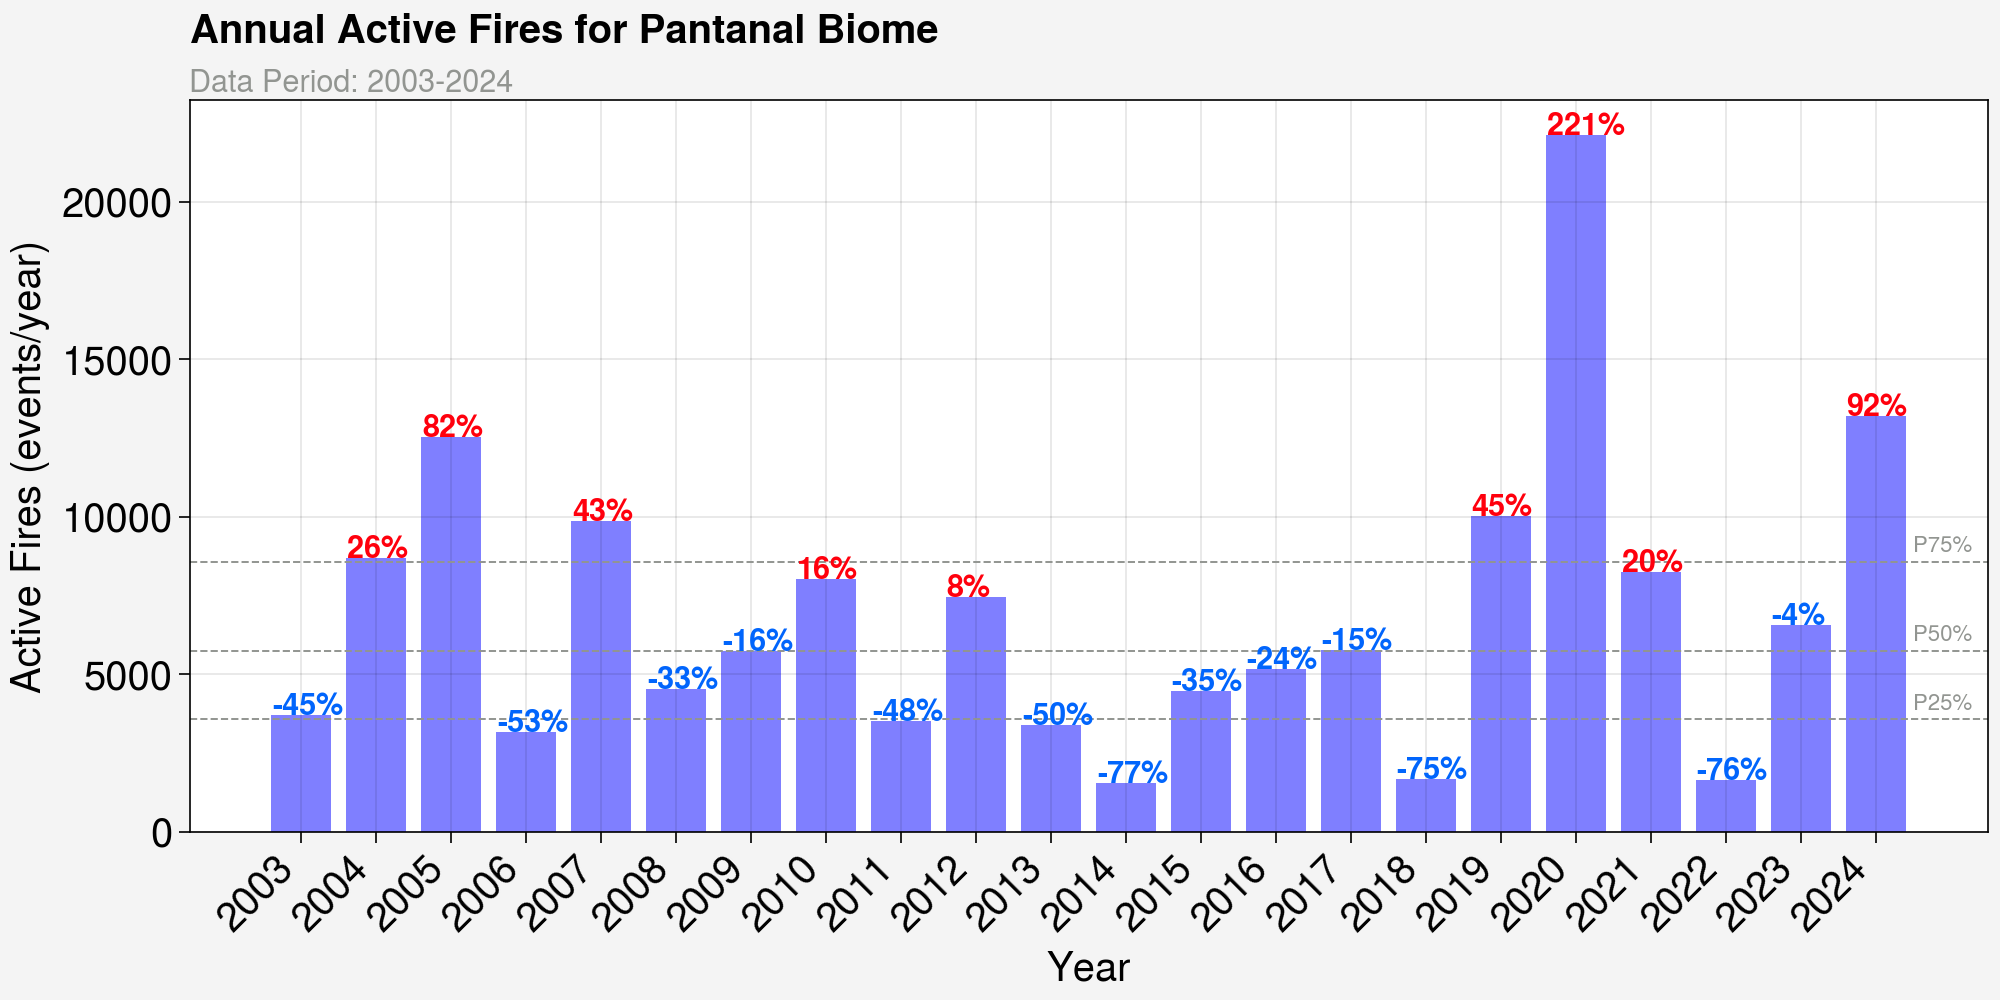

In [266]:
# seleciona os focos para um determinado Estado
df_total_filtrado = df_total[ df_total['bioma'] == 'Pantanal' ]

# calculando a anual total
anual = df_total_filtrado.groupby(pd.Grouper(freq='1Y')).count()['lat']

# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
for ano, focos, anomalia in zip(anual.index.year, anual.values, anomalias):
    val = f'{str(int(anomalia))}%'
    if anomalia > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax.text(ano-0.39, focos, val, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax.format(title='Annual Active Fires for Pantanal Biome\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year',
          ylabel='Active Fires (events/year)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2003,2024,1),
          xrotation=45)

# plota subtítulo
ax.text(2001.5, 23500, f'Data Period: 2003-2024', color='gray', fontsize=11)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual.values, 25)
p50 = np.percentile(anual.values, 50)
p75 = np.percentile(anual.values, 75)
ax.axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax.axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax.axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax.text(2024.5, p25+300, 'P25%', color='gray', fontsize=8)
ax.text(2024.5, p50+300, 'P50%', color='gray', fontsize=8)
ax.text(2024.5, p75+300, 'P75%', color='gray', fontsize=8)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_5_anual_pantanal.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por ano - `AMAZÔNIA`

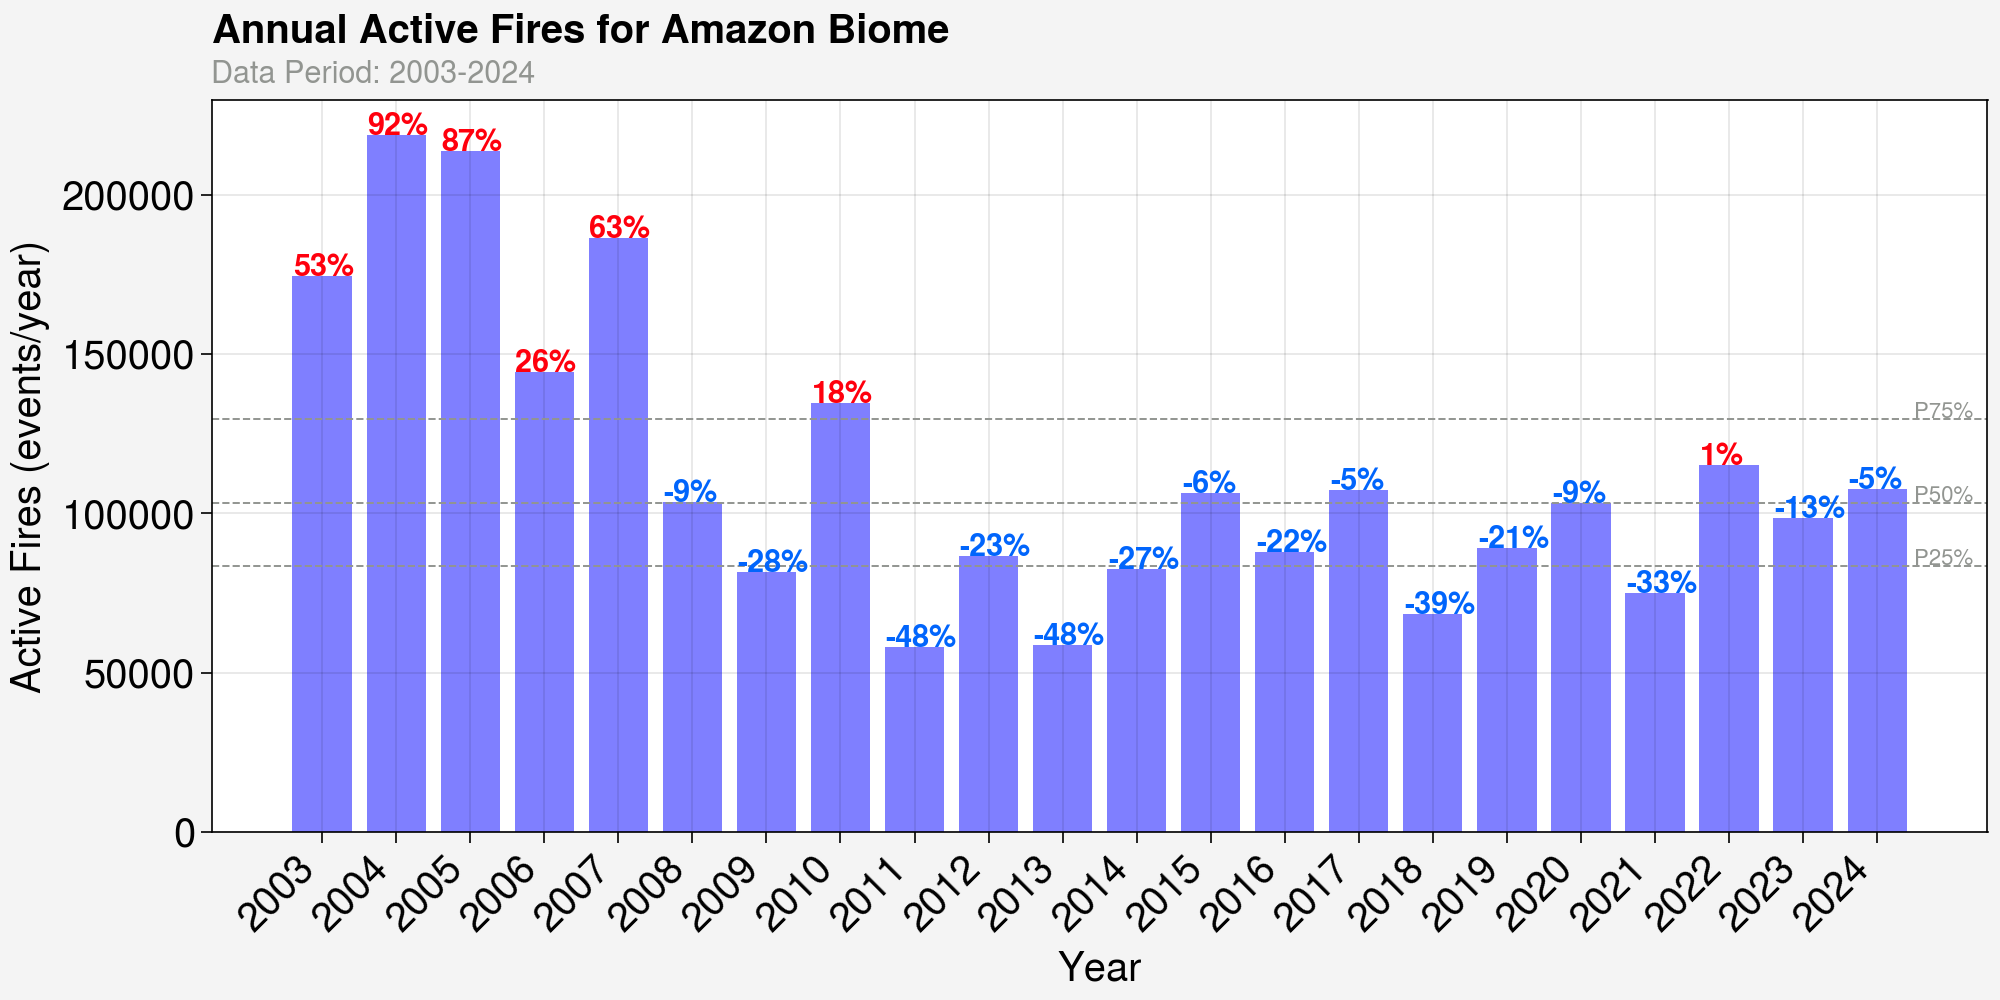

In [267]:
# seleciona os focos para um determinado Estado
df_total_filtrado = df_total[ df_total['bioma'] == 'Amazônia' ]

# calculando a anual total
anual = df_total_filtrado.groupby(pd.Grouper(freq='1Y')).count()['lat']

# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
for ano, focos, anomalia in zip(anual.index.year, anual.values, anomalias):
    val = f'{str(int(anomalia))}%'
    if anomalia > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax.text(ano-0.39, focos, val, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax.format(title='Annual Active Fires for Amazon Biome\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year',
          ylabel='Active Fires (events/year)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2003,2024,1),
          xrotation=45)

# plota subtítulo
ax.text(2001.5, 235000, f'Data Period: 2003-2024', color='gray', fontsize=11)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual.values, 25)
p50 = np.percentile(anual.values, 50)
p75 = np.percentile(anual.values, 75)
ax.axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax.axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax.axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax.text(2024.5, p25+300, 'P25%', color='gray', fontsize=8)
ax.text(2024.5, p50+300, 'P50%', color='gray', fontsize=8)
ax.text(2024.5, p75+300, 'P75%', color='gray', fontsize=8)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_7_anual_amazonia.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por ano - `CERRADO`

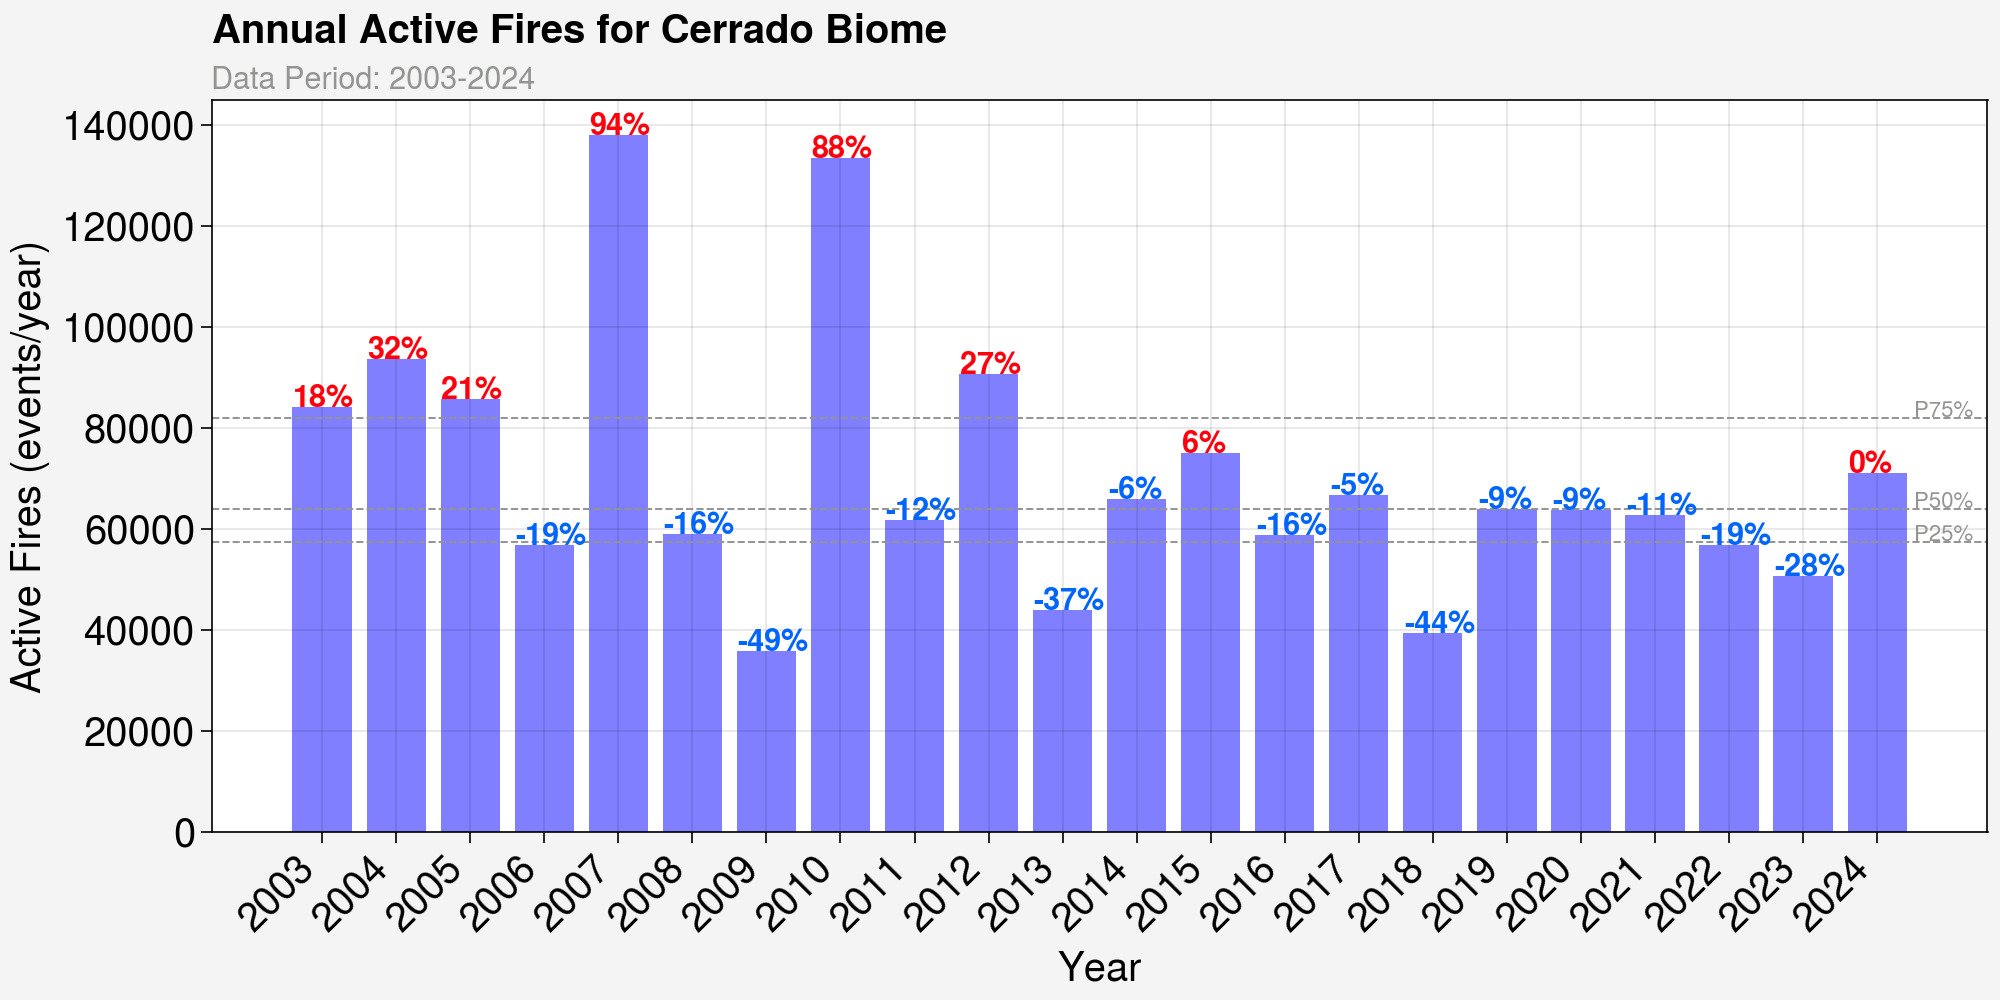

In [268]:
# seleciona os focos para um determinado Estado
df_total_filtrado = df_total[ df_total['bioma'] == 'Cerrado' ]

# calculando a anual total
anual = df_total_filtrado.groupby(pd.Grouper(freq='1Y')).count()['lat']

# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year,
       anual.values,
       color='blue',
       alpha=0.5)

# insere os valores de anomalia no topo das barras
anomalias = ((anual.values - np.mean(anual.values)) / np.mean(anual.values)) * 100.
for ano, focos, anomalia in zip(anual.index.year, anual.values, anomalias):
    val = f'{str(int(anomalia))}%'
    if anomalia > 0.:
        cor = 'bright red'
    else:
        cor = 'bright blue'
    ax.text(ano-0.39, focos, val, color=cor, fontsize=11, weight='bold')
    
# formatação do eixo
ax.format(title='Annual Active Fires for Cerrado Biome\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year',
          ylabel='Active Fires (events/year)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xticks=pplt.arange(2003,2024,1),
          xrotation=45)

# plota subtítulo
ax.text(2001.5, 147000, f'Data Period: 2003-2024', color='gray', fontsize=11)

# plota percentil de 25%, 50%, 75% 
p25 = np.percentile(anual.values, 25)
p50 = np.percentile(anual.values, 50)
p75 = np.percentile(anual.values, 75)
ax.axhline(p25, color='gray', linestyle='--', lw=0.7, label='P25%')
ax.axhline(p50, color='gray', linestyle='--', lw=0.7, label='P50%')
ax.axhline(p75, color='gray', linestyle='--', lw=0.7, label='P75%')
ax.text(2024.5, p25+300, 'P25%', color='gray', fontsize=8)
ax.text(2024.5, p50+300, 'P50%', color='gray', fontsize=8)
ax.text(2024.5, p75+300, 'P75%', color='gray', fontsize=8)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_8_anual_cerrado.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# 10 Hotspot munícipios do `Brasil`

In [269]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


In [270]:
# seleciona dados de 2024
df_total_2024 = df_total.loc['2024']

# nomes das cidades
cidades = df_total_2024['municipio'].value_counts(normalize=False).index[0:10]

# quantide de focos de calor por cidade
valores = df_total_2024['municipio'].value_counts(normalize=False).values[0:10] #; valores = valores * 100. 

# mostra na tela
print(cidades, valores)

Index(['SÃO FÉLIX DO XINGU', 'ALTAMIRA', 'CORUMBÁ', 'NOVO PROGRESSO', 'APUÍ',
       'LÁBREA', 'ITAITUBA', 'PORTO VELHO', 'CÁCERES', 'COLNIZA'],
      dtype='object') [7101 5707 4907 4743 4470 4120 3096 3045 2625 2508]


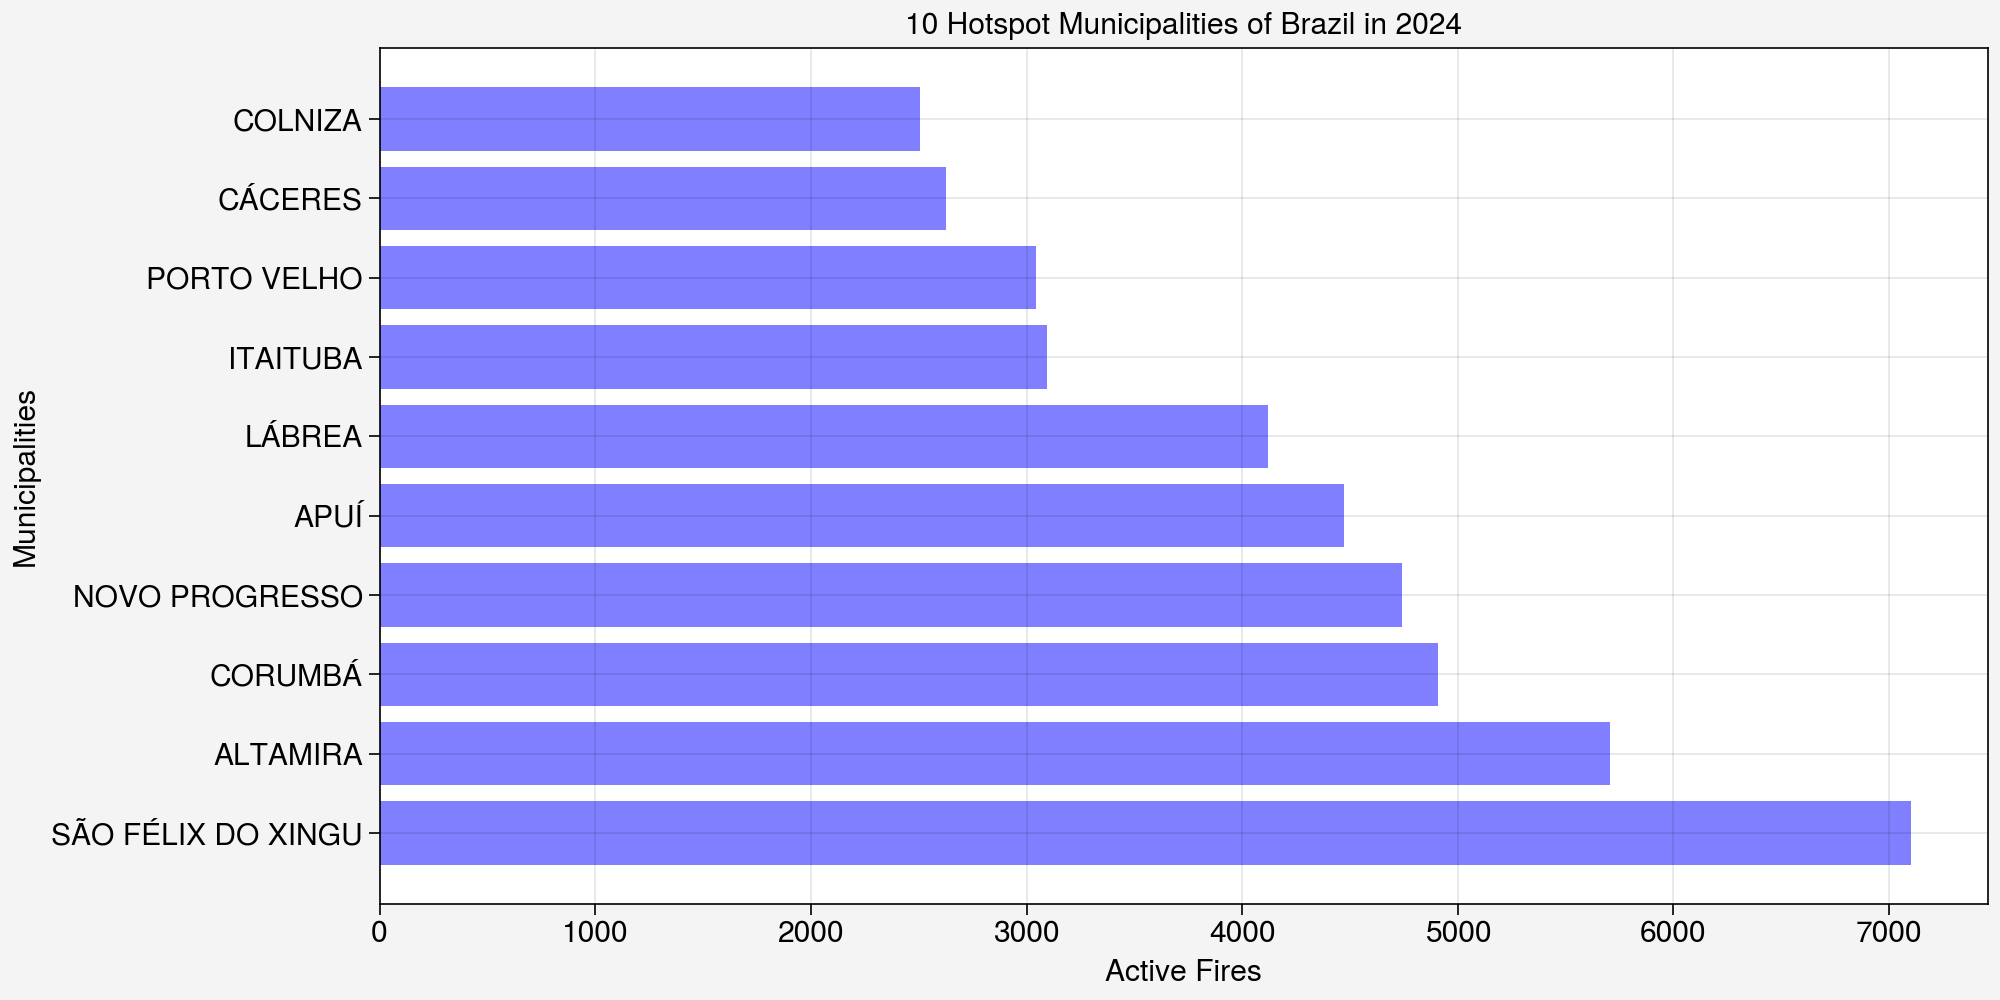

In [271]:
# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de barras
ax.barh(cidades,
        valores,
        color='blue',
        alpha=0.5)

# formatação do eixo
ax.format(title='10 Hotspot Municipalities of Brazil in 2024',
          ylabel='Municipalities',
          xlabel='Active Fires',
          small='15px',
          large='15px',
          xtickminor=False,
          ytickminor=False)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_9_10hotspot_brasil.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# 10 Hotspot munícipios do `São Paulo`

In [272]:
df_total_2024

,lat,lon,municipio,estado,bioma
data,,,,,
2024-01-01 16:24:00,-9.40673,-43.39546,CAMPO ALEGRE DE LOURDES,BAHIA,Caatinga
2024-01-01 16:24:00,-8.98773,-35.30147,MARAGOGI,ALAGOAS,Mata Atlântica
2024-01-01 16:24:00,-9.49237,-35.99889,ATALAIA,ALAGOAS,Mata Atlântica
2024-01-01 16:24:00,-9.40481,-43.39119,CAMPO ALEGRE DE LOURDES,BAHIA,Caatinga
2024-01-01 16:24:00,-8.46425,-35.31528,ESCADA,PERNAMBUCO,Mata Atlântica
...,...,...,...,...,...
2024-10-07 18:47:00,-8.71365,-66.89462,LÁBREA,AMAZONAS,Amazônia
2024-10-07 18:47:00,-8.71499,-66.90406,LÁBREA,AMAZONAS,Amazônia
2024-10-07 18:47:00,-7.94438,-72.48077,CRUZEIRO DO SUL,ACRE,Amazônia


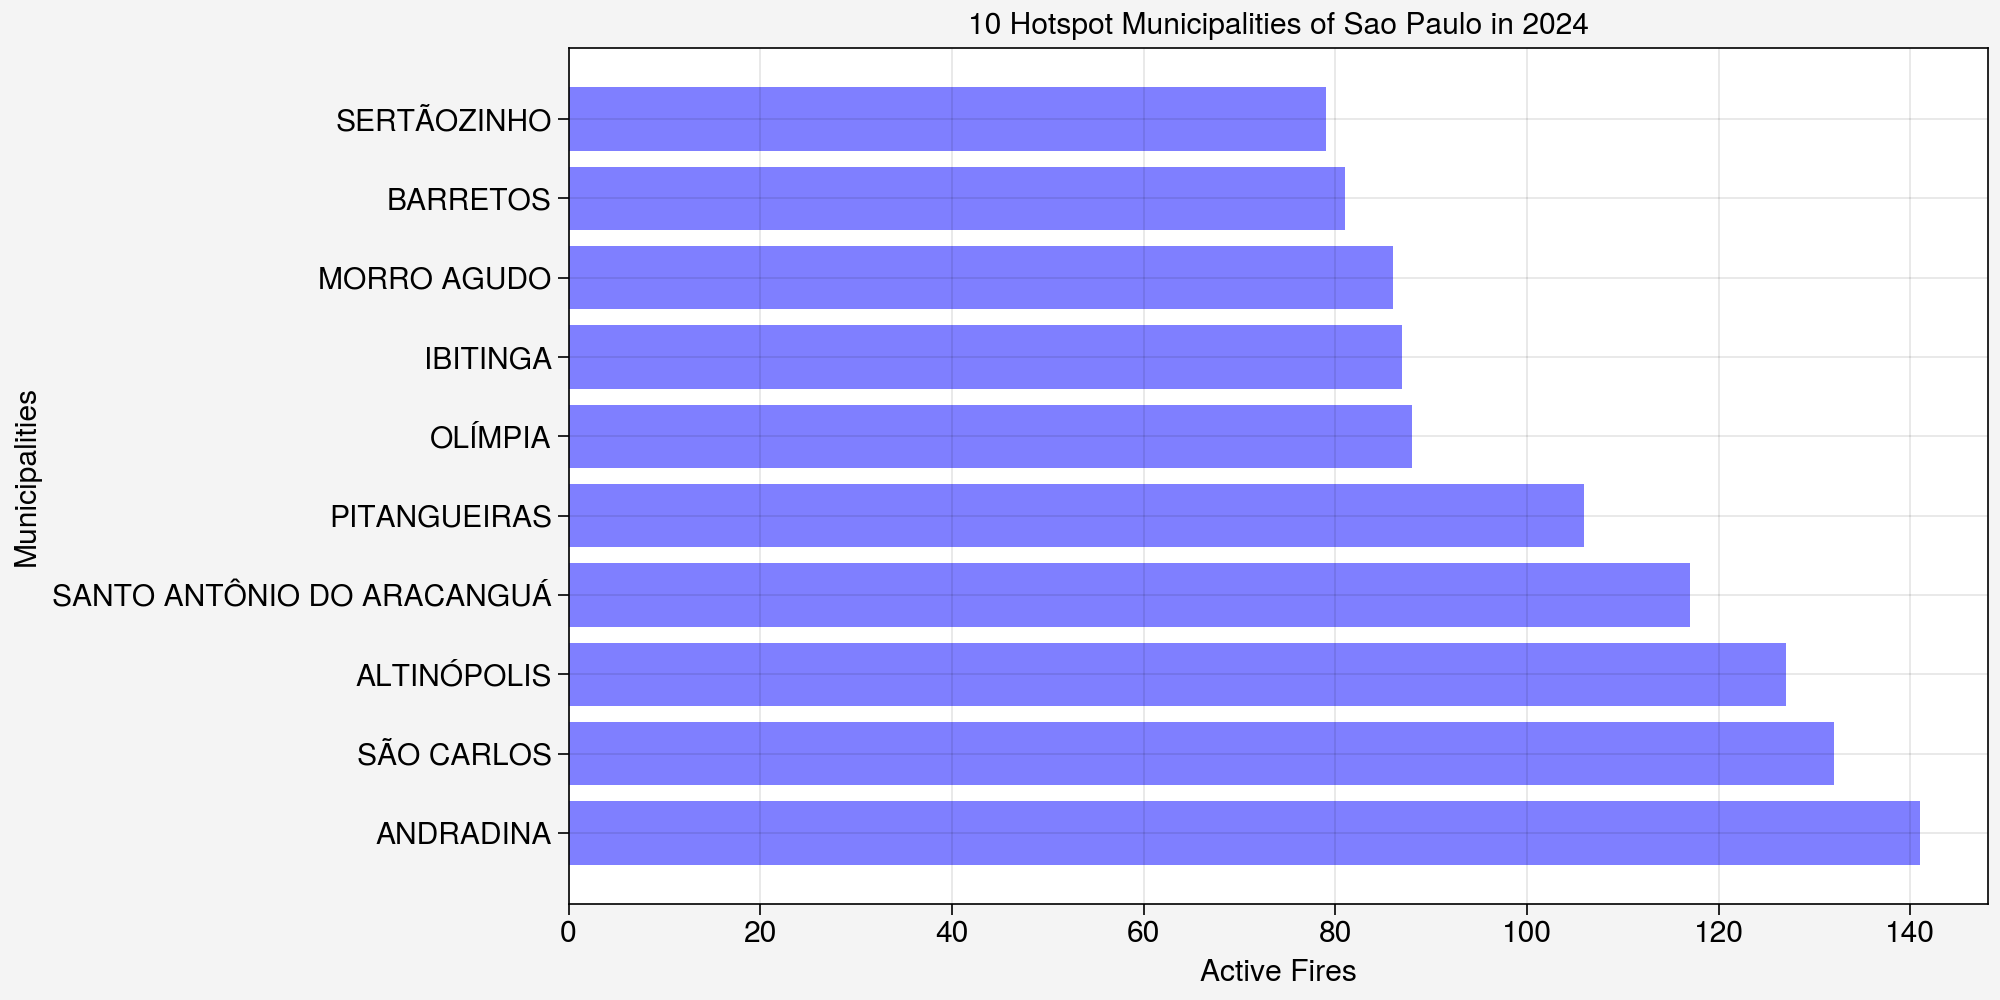

In [273]:
# seleciona dados de 2024
df_total_2024 = df_total.loc['2024']

# seleciona SP
df_total_2024 = df_total_2024[ df_total_2024['estado'] ==  'SÃO PAULO' ]

# nomes das cidades
cidades = df_total_2024['municipio'].value_counts(normalize=False).index[0:10]

# quantide de focos de calor por cidade
valores = df_total_2024['municipio'].value_counts(normalize=False).values[0:10] #; valores = valores * 100. 

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de barras
ax.barh(cidades,
        valores,
        color='blue',
        alpha=0.5)

# formatação do eixo
ax.format(title='10 Hotspot Municipalities of Sao Paulo in 2024',
          ylabel='Municipalities',
          xlabel='Active Fires',
          small='15px',
          large='15px',
          xtickminor=False,
          ytickminor=False)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_10_10hotspot_sp.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por mês - `SÃO PAULO` - `USAR ESTE`

In [12]:
df_total

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.82900,-40.13300,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.62100,-41.66500,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.27600,-41.51400,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.11100,-36.50500,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.88600,-37.81500,ESPLANADA,BAHIA,Mata Atlântica
...,...,...,...,...,...
2024-12-31 17:53:00,-0.30758,-51.71391,MAZAGÃO,AMAPÁ,Amazônia
2024-12-31 17:53:00,-1.21053,-52.02901,ALMEIRIM,PARÁ,Amazônia
2024-12-31 17:53:00,-2.27447,-54.47422,SANTARÉM,PARÁ,Amazônia


In [13]:
# seleciona os focos para um determinado Estado
df_total_filtrado = df_total[ df_total['estado'] == 'SÃO PAULO' ]

# calculando a anual total
df_mensal = df_total_filtrado.groupby(pd.Grouper(freq='1M')).count()['lat']
df_mensal

data
2003-01-31      67
2003-02-28     184
2003-03-31      96
2003-04-30     165
2003-05-31     385
              ... 
2024-08-31    3612
2024-09-30    2522
2024-10-31     714
2024-11-30      27
2024-12-31      41
Freq: M, Name: lat, Length: 264, dtype: int64

In [14]:
df_mensal['2024']

data
2024-01-31      75
2024-02-29      93
2024-03-31     138
2024-04-30      63
2024-05-31     398
2024-06-30     532
2024-07-31     499
2024-08-31    3612
2024-09-30    2522
2024-10-31     714
2024-11-30      27
2024-12-31      41
Freq: M, Name: lat, dtype: int64

In [15]:
df_mensal['2024'].values

array([  75,   93,  138,   63,  398,  532,  499, 3612, 2522,  714,   27,
         41], dtype=int64)

In [20]:
val2024 = df_mensal['2024'].values
#val2024 = np.append(val2024, np.nan)
#val2024 = np.append(val2024, np.nan)
val2024

array([  75,   93,  138,   63,  398,  532,  499, 3612, 2522,  714,   27,
         41], dtype=int64)

In [21]:
df_mensal = df_total_filtrado.groupby(pd.Grouper(freq='1M')).count()['lat']
df_mensal

data
2003-01-31      67
2003-02-28     184
2003-03-31      96
2003-04-30     165
2003-05-31     385
              ... 
2024-08-31    3612
2024-09-30    2522
2024-10-31     714
2024-11-30      27
2024-12-31      41
Freq: M, Name: lat, Length: 264, dtype: int64

In [22]:
df_mensal_total = df_total_filtrado.groupby(pd.Grouper(freq='1M')).count()['lat']

df_mensal_climatologia = df_mensal_total.groupby(df_mensal_total.index.month).mean()
df_mensal_climatologia

data
1       57.954545
2       94.272727
3      109.227273
4      133.363636
5      233.454545
6      314.272727
7      545.000000
8     1053.590909
9      984.181818
10     301.318182
11      93.181818
12      68.000000
Name: lat, dtype: float64

In [24]:
df_total_filtrado

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-02 16:45:00,-22.55400,-49.22000,PAULISTÂNIA,SÃO PAULO,Cerrado
2003-01-02 16:45:00,-22.74400,-49.01200,BOREBI,SÃO PAULO,Cerrado
2003-01-02 16:45:00,-22.87500,-50.12100,IBIRAREMA,SÃO PAULO,Mata Atlântica
2003-01-02 16:45:00,-22.50900,-50.02300,OCAUÇU,SÃO PAULO,Cerrado
2003-01-02 16:45:00,-22.89700,-50.74800,FLORÍNEA,SÃO PAULO,Mata Atlântica
...,...,...,...,...,...
2024-12-31 17:49:00,-20.52450,-50.79371,PALMEIRA D'OESTE,SÃO PAULO,Mata Atlântica
2024-12-31 17:49:00,-20.38414,-48.74170,BARRETOS,SÃO PAULO,Cerrado
2024-12-31 17:49:00,-20.70576,-49.14645,GUAPIAÇU,SÃO PAULO,Cerrado


In [28]:
df_mensal_total.index

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', name='data', length=264, freq='M')

In [26]:
df_mensal_climatologia

data
1       57.954545
2       94.272727
3      109.227273
4      133.363636
5      233.454545
6      314.272727
7      545.000000
8     1053.590909
9      984.181818
10     301.318182
11      93.181818
12      68.000000
Name: lat, dtype: float64

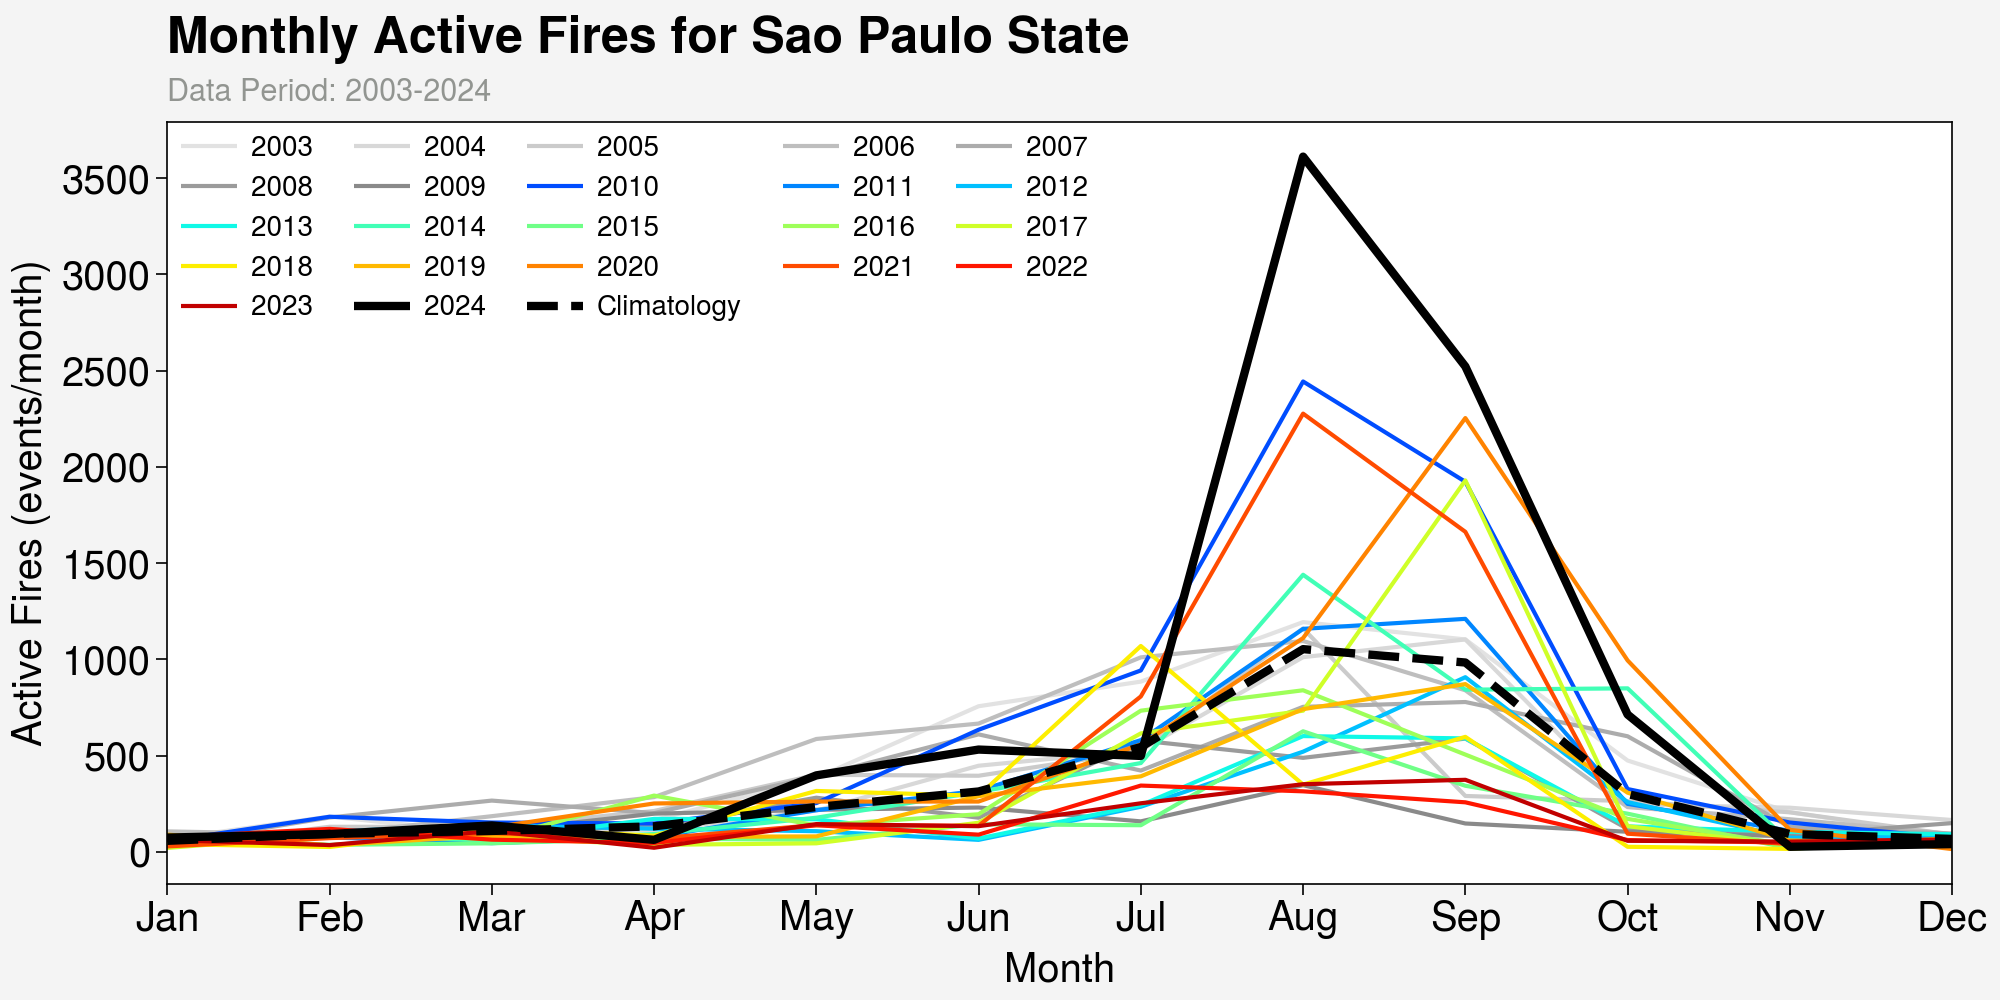

In [27]:
#========================================================================================================================#
#                                          IMPORTA BIBLIOTECAS
#========================================================================================================================#
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                          ACUMULA PARA MENSAL
#========================================================================================================================#
# seleciona os focos para um determinado Estado
df_total_filtrado = df_total[ df_total['estado'] == 'SÃO PAULO' ]

# calculando o mensal total
df_mensal_total = df_total_filtrado.groupby(pd.Grouper(freq='1M')).count()['lat']

# calculando o mensal climatologia
df_mensal_climatologia = df_mensal_total.groupby(df_mensal_total.index.month).mean()

#========================================================================================================================#
#                                                PLOTA FIGURA
#========================================================================================================================#
# moldura da figura
fig, ax = pplt.subplots(figsize=(10,5), tight=True)

# 2003-2009
anoi, anof = 2003, 2009
cycle = pplt.Cycle('Greys', left=0.2, N=15)
for ano in np.arange(anoi, anof+1):
    ax.plot(pplt.arange(1, 12, 1), 
            df_mensal_total[str(ano)].values,
            label=str(ano), 
            cycle=cycle)

# 2010-2023
anoi, anof = 2010, 2023
cycle = pplt.Cycle('jet', left=0.2, N=15)
for ano in np.arange(anoi, anof+1):
    ax.plot(pplt.arange(1, 12, 1), 
            df_mensal_total[str(ano)].values, 
            label=str(ano), 
            cycle=cycle)

# 2024
val2024 = dfx.values
ax.plot(pplt.arange(1, 12, 1), 
        val2024, 
        label='2024', 
        color='black', 
        lw=3)

# mensal climatologia
ax.plot(pplt.arange(1, 12, 1), 
        df_mensal_climatologia.values, 
        label='Climatology', 
        color='black', 
        lw=3, 
        ls='--')

# formato dos eixos
ax.format(title='Monthly Active Fires for Sao Paulo State\n ',
          titleloc='l',
          titleweight='bold',
          titlecolor='black',
          ylabel='Active Fires (events/month)',
          small='20px',
          large='25px',
          xlabel='Month', xticks=1,
          xticklabels=['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
          xrotation=0, xtickminor=False, ytickminor=False, grid=False)

# plota subtítulo
ax.text(1, 3900, f'Data Period: 2003-2024', color='gray', fontsize=11)

# legenda
ax.legend(loc='best', ncols=5, frameon=False, prop={'size':10})

# salva figura
#fig.save(f'output/02_figuras_focos/Fig_11_mensal_sp.jpg', dpi=300)
fig.save(f'output/Fig_11_mensal_sp.jpg', dpi=300)

# Série temporal dos focos por dia de 2024 - `BRASIL`

In [3]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


In [5]:
df_total_2024 = df_total.loc['2024']
df_total_2024

,lat,lon,municipio,estado,bioma
data,,,,,
2024-01-01 16:24:00,-9.40673,-43.39546,CAMPO ALEGRE DE LOURDES,BAHIA,Caatinga
2024-01-01 16:24:00,-8.98773,-35.30147,MARAGOGI,ALAGOAS,Mata Atlântica
2024-01-01 16:24:00,-9.49237,-35.99889,ATALAIA,ALAGOAS,Mata Atlântica
2024-01-01 16:24:00,-9.40481,-43.39119,CAMPO ALEGRE DE LOURDES,BAHIA,Caatinga
2024-01-01 16:24:00,-8.46425,-35.31528,ESCADA,PERNAMBUCO,Mata Atlântica
...,...,...,...,...,...
2024-10-07 18:47:00,-8.71365,-66.89462,LÁBREA,AMAZONAS,Amazônia
2024-10-07 18:47:00,-8.71499,-66.90406,LÁBREA,AMAZONAS,Amazônia
2024-10-07 18:47:00,-7.94438,-72.48077,CRUZEIRO DO SUL,ACRE,Amazônia


In [6]:
# calculando a anual total
focos_2024_por_dia = df_total_2024.groupby(pd.Grouper(freq='1D')).count()['lat']
focos_2024_por_dia

data
2024-01-01      44
2024-01-02      34
2024-01-03     175
2024-01-04     192
2024-01-05     130
              ... 
2024-10-03    1443
2024-10-04     939
2024-10-05    1098
2024-10-06     899
2024-10-07     976
Freq: D, Name: lat, Length: 281, dtype: int64

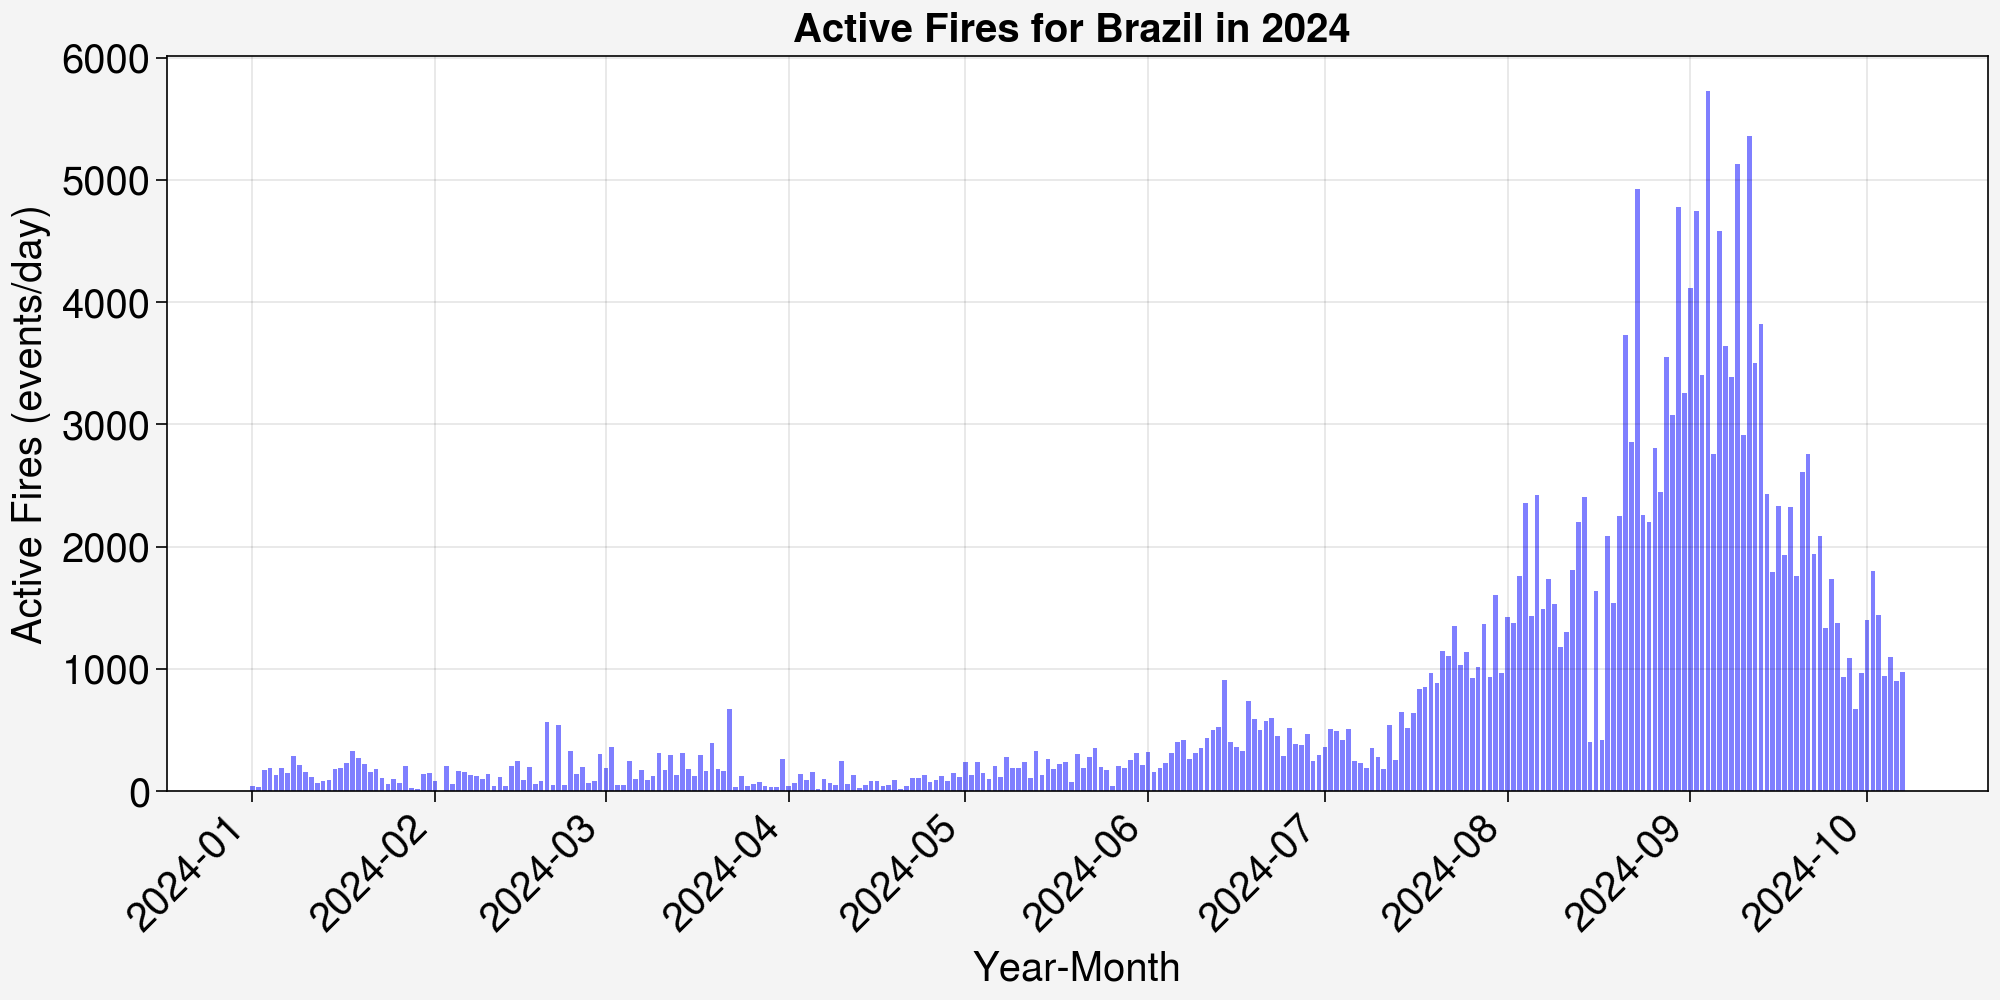

In [22]:
# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(focos_2024_por_dia.index,
       focos_2024_por_dia.values,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(title='Active Fires for Brazil in 2024 ',
          titleloc='c',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year-Month',
          ylabel='Active Fires (events/day)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xrotation=45)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_12_focos_por_dia_2024_brasil.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por dia de 2024 - `SÃO PAULO`

In [23]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


In [26]:
df_total_2024 = df_total.loc['2024']
df_total_2024

,lat,lon,municipio,estado,bioma
data,,,,,
2024-01-01 16:24:00,-9.40673,-43.39546,CAMPO ALEGRE DE LOURDES,BAHIA,Caatinga
2024-01-01 16:24:00,-8.98773,-35.30147,MARAGOGI,ALAGOAS,Mata Atlântica
2024-01-01 16:24:00,-9.49237,-35.99889,ATALAIA,ALAGOAS,Mata Atlântica
2024-01-01 16:24:00,-9.40481,-43.39119,CAMPO ALEGRE DE LOURDES,BAHIA,Caatinga
2024-01-01 16:24:00,-8.46425,-35.31528,ESCADA,PERNAMBUCO,Mata Atlântica
...,...,...,...,...,...
2024-10-07 18:47:00,-8.71365,-66.89462,LÁBREA,AMAZONAS,Amazônia
2024-10-07 18:47:00,-8.71499,-66.90406,LÁBREA,AMAZONAS,Amazônia
2024-10-07 18:47:00,-7.94438,-72.48077,CRUZEIRO DO SUL,ACRE,Amazônia


In [28]:
df_total_2024 = df_total_2024[ df_total_2024['estado'] == 'SÃO PAULO' ]
df_total_2024

,lat,lon,municipio,estado,bioma
data,,,,,
2024-01-02 17:04:00,-20.54684,-49.43139,NOVA GRANADA,SÃO PAULO,Cerrado
2024-01-02 17:04:00,-21.93134,-47.27146,SANTA CRUZ DAS PALMEIRAS,SÃO PAULO,Mata Atlântica
2024-01-02 17:04:00,-20.15670,-48.18394,MIGUELÓPOLIS,SÃO PAULO,Cerrado
2024-01-02 17:04:00,-20.46482,-49.50798,PALESTINA,SÃO PAULO,Cerrado
2024-01-02 17:04:00,-20.72576,-47.88945,ORLÂNDIA,SÃO PAULO,Cerrado
...,...,...,...,...,...
2024-10-07 17:05:00,-21.29140,-47.62207,SERRA AZUL,SÃO PAULO,Cerrado
2024-10-07 17:05:00,-22.80723,-48.42953,BOTUCATU,SÃO PAULO,Cerrado
2024-10-07 17:05:00,-22.46940,-47.53707,SANTA GERTRUDES,SÃO PAULO,Mata Atlântica


In [29]:
# calculando a anual total
focos_2024_por_dia = df_total_2024.groupby(pd.Grouper(freq='1D')).count()['lat']
focos_2024_por_dia

data
2024-01-02     5
2024-01-03     3
2024-01-04     2
2024-01-05     4
2024-01-06     0
              ..
2024-10-03    61
2024-10-04    26
2024-10-05    19
2024-10-06    63
2024-10-07    29
Freq: D, Name: lat, Length: 280, dtype: int64

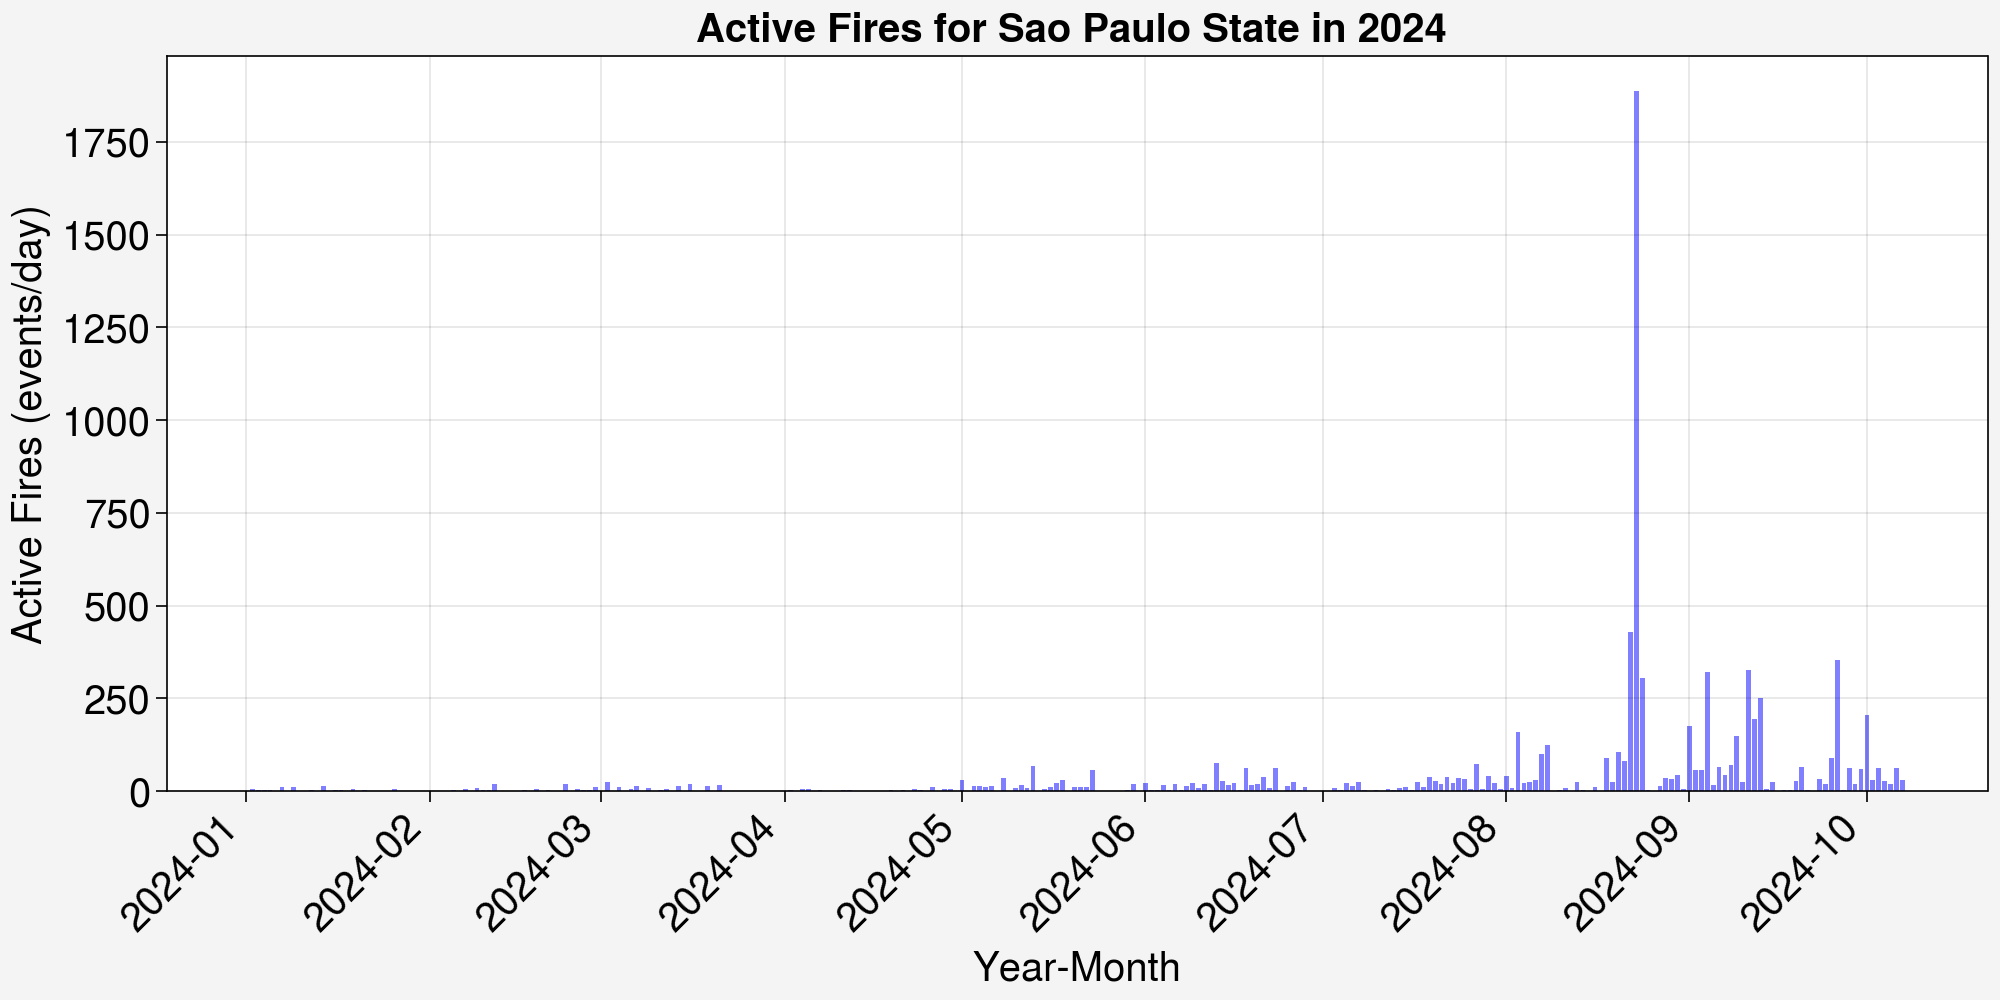

In [30]:
# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(focos_2024_por_dia.index,
       focos_2024_por_dia.values,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(title='Active Fires for Sao Paulo State in 2024 ',
          titleloc='c',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Year-Month',
          ylabel='Active Fires (events/day)',          
          small='20px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xrotation=45)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_13_focos_por_dia_2024_sp.jpg', dpi=300)

# exibe figura na tela
pplt.show()

# Série temporal dos focos por dia de `ago-set-out` com as datas de 2024 - `SÃO PAULO`

In [4]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


In [7]:
# seleciona o período dos dados de ago-set-out
df_total_ago_set_out_2024 = df_total.loc['2024-08-01':'2024-10-31']

# seleciona o estado de SP
df_total_ago_set_out_2024 = df_total_ago_set_out_2024[ df_total_ago_set_out_2024['estado'] == 'SÃO PAULO' ]

# calculando a anual total
focos_agosetout2024_por_dia = df_total_ago_set_out_2024.groupby(pd.Grouper(freq='1D')).count()['lat']
focos_agosetout2024_por_dia

data
2024-08-01    1422
2024-08-02    1372
2024-08-03    1761
2024-08-04    2354
2024-08-05    1430
              ... 
2024-10-27    1700
2024-10-28     791
2024-10-29    1175
2024-10-30     683
2024-10-31     339
Freq: D, Name: lat, Length: 92, dtype: int64

In [36]:
mes, dia, valores = focos_agosetout2024_por_dia.index.month.tolist(), focos_agosetout2024_por_dia.index.day.tolist(), focos_agosetout2024_por_dia.values.tolist()
mes_dia = []
for mesi, diai in zip(mes, dia):
    if mesi == 8:
       mes_dia.append(f'Aug/{str(diai).zfill(2)}')
    elif mesi == 9:
       mes_dia.append(f'Sep/{str(diai).zfill(2)}')
    else: 
       mes_dia.append(f'Oct/{str(diai).zfill(2)}')
#mes_dia

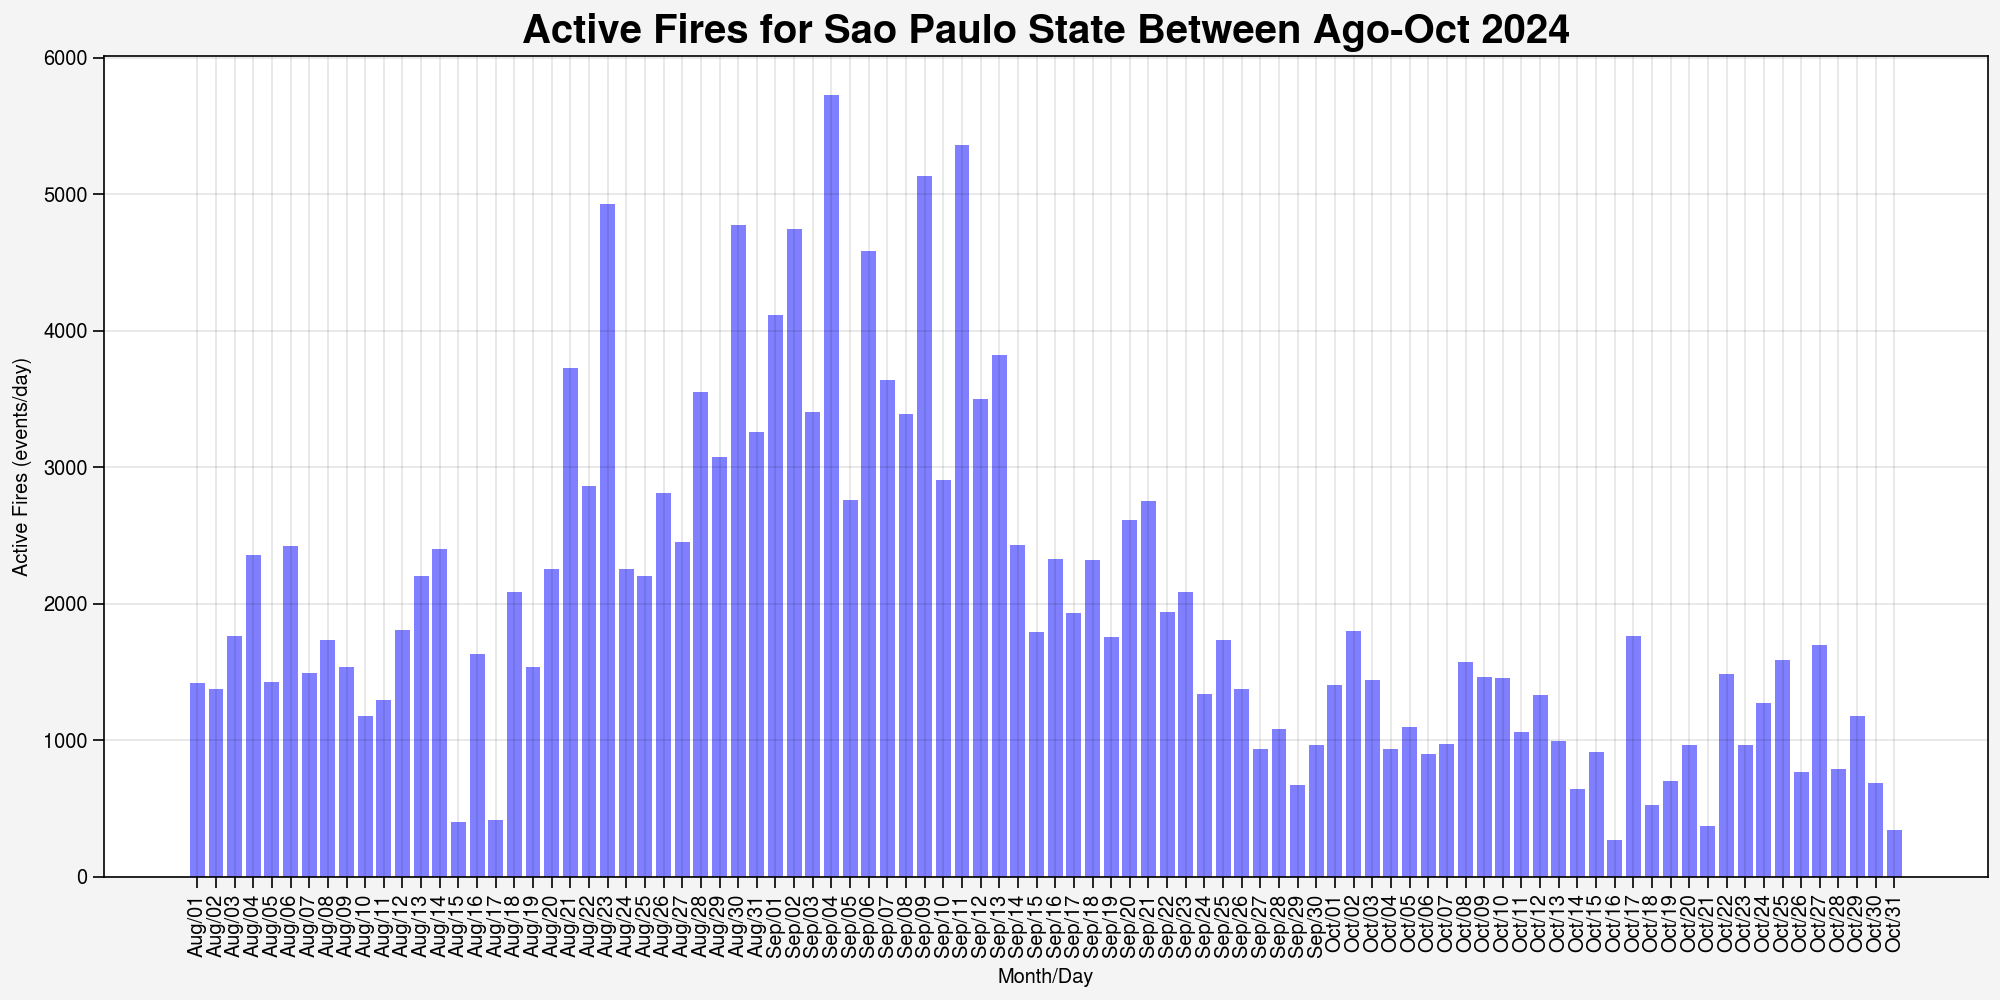

In [37]:
# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(mes_dia,
       valores,
       color='blue',
       alpha=0.5)

# formatação do eixo
ax.format(title='Active Fires for Sao Paulo State Between Ago-Oct 2024',
          titleloc='c',
          titleweight='bold',
          titlecolor='black',          
          xlabel='Month/Day',
          ylabel='Active Fires (events/day)',          
          small='10px',
          large='20px',
          xtickminor=False,
          ytickminor=False,
          xrotation=90)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_13b_focos_por_dia_ago_set_out_2024_sp.jpg', dpi=300)

# exibe figura na tela
pplt.show()

In [19]:
# salva os dados para arquivo CSV
df = pd.DataFrame({'dia-mes-ano': focos_agosetout2024_por_dia.index,
                   'focos/dia': focos_agosetout2024_por_dia.values})
df.to_csv('output/02_figuras_focos/tabela_focos_por_dia_ago_set_out_2024_sp.csv', sep=';', index=False)
df

,dia-mes-ano,focos/dia
0,2024-08-01,1422
1,2024-08-02,1372
2,2024-08-03,1761
3,2024-08-04,2354
4,2024-08-05,1430
...,...,...
87,2024-10-27,1700
88,2024-10-28,791
89,2024-10-29,1175
90,2024-10-30,683


# Top5 cidades do estado de SP em agosto com mais focos de calor

In [3]:
df_total.head()

,lat,lon,municipio,estado,bioma
data,,,,,
2003-01-01 16:04:00,-14.829,-40.133,NOVA CANAÃ,BAHIA,Mata Atlântica
2003-01-01 16:04:00,-15.621,-41.665,BERIZAL,MINAS GERAIS,Mata Atlântica
2003-01-01 16:04:00,-15.276,-41.514,TREMEDAL,BAHIA,Mata Atlântica
2003-01-01 16:05:00,-10.111,-36.505,IGREJA NOVA,ALAGOAS,Caatinga
2003-01-01 16:05:00,-11.886,-37.815,ESPLANADA,BAHIA,Mata Atlântica


In [12]:
df_total_2024['municipio'].value_counts(normalize=False, sort=True).index[0:10]

Index(['PITANGUEIRAS', 'ALTINÓPOLIS', 'IBITINGA', 'SERTÃOZINHO', 'OLÍMPIA',
       'PATROCÍNIO PAULISTA', 'CAJURU', 'JABOTICABAL', 'PONTAL',
       'PONTES GESTAL'],
      dtype='object')

In [14]:
df_total_2024['municipio'].value_counts(normalize=False, ascending=True).index[0:10]

Index(['MIRANTE DO PARANAPANEMA', 'PIRACAIA', 'SÃO LUIZ DO PARAITINGA',
       'RIO GRANDE DA SERRA', 'RIBEIRÃO PIRES', 'FLÓRIDA PAULISTA',
       'ARCO-ÍRIS', 'ÓLEO', 'CORUMBATAÍ', 'DIVINOLÂNDIA'],
      dtype='object')

In [21]:
df_total_2024['municipio'].value_counts(normalize=False).index[0:10].tolist()

['PITANGUEIRAS',
 'ALTINÓPOLIS',
 'IBITINGA',
 'SERTÃOZINHO',
 'OLÍMPIA',
 'PATROCÍNIO PAULISTA',
 'CAJURU',
 'JABOTICABAL',
 'PONTAL',
 'PONTES GESTAL']

In [25]:
a =df_total_2024['municipio'].value_counts(normalize=False).index[0:10].tolist()
a.reverse()
print(a)

['PONTES GESTAL', 'PONTAL', 'JABOTICABAL', 'CAJURU', 'PATROCÍNIO PAULISTA', 'OLÍMPIA', 'SERTÃOZINHO', 'IBITINGA', 'ALTINÓPOLIS', 'PITANGUEIRAS']


In [16]:
df_total_2024['municipio'].value_counts(normalize=False, ascending=True).values[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

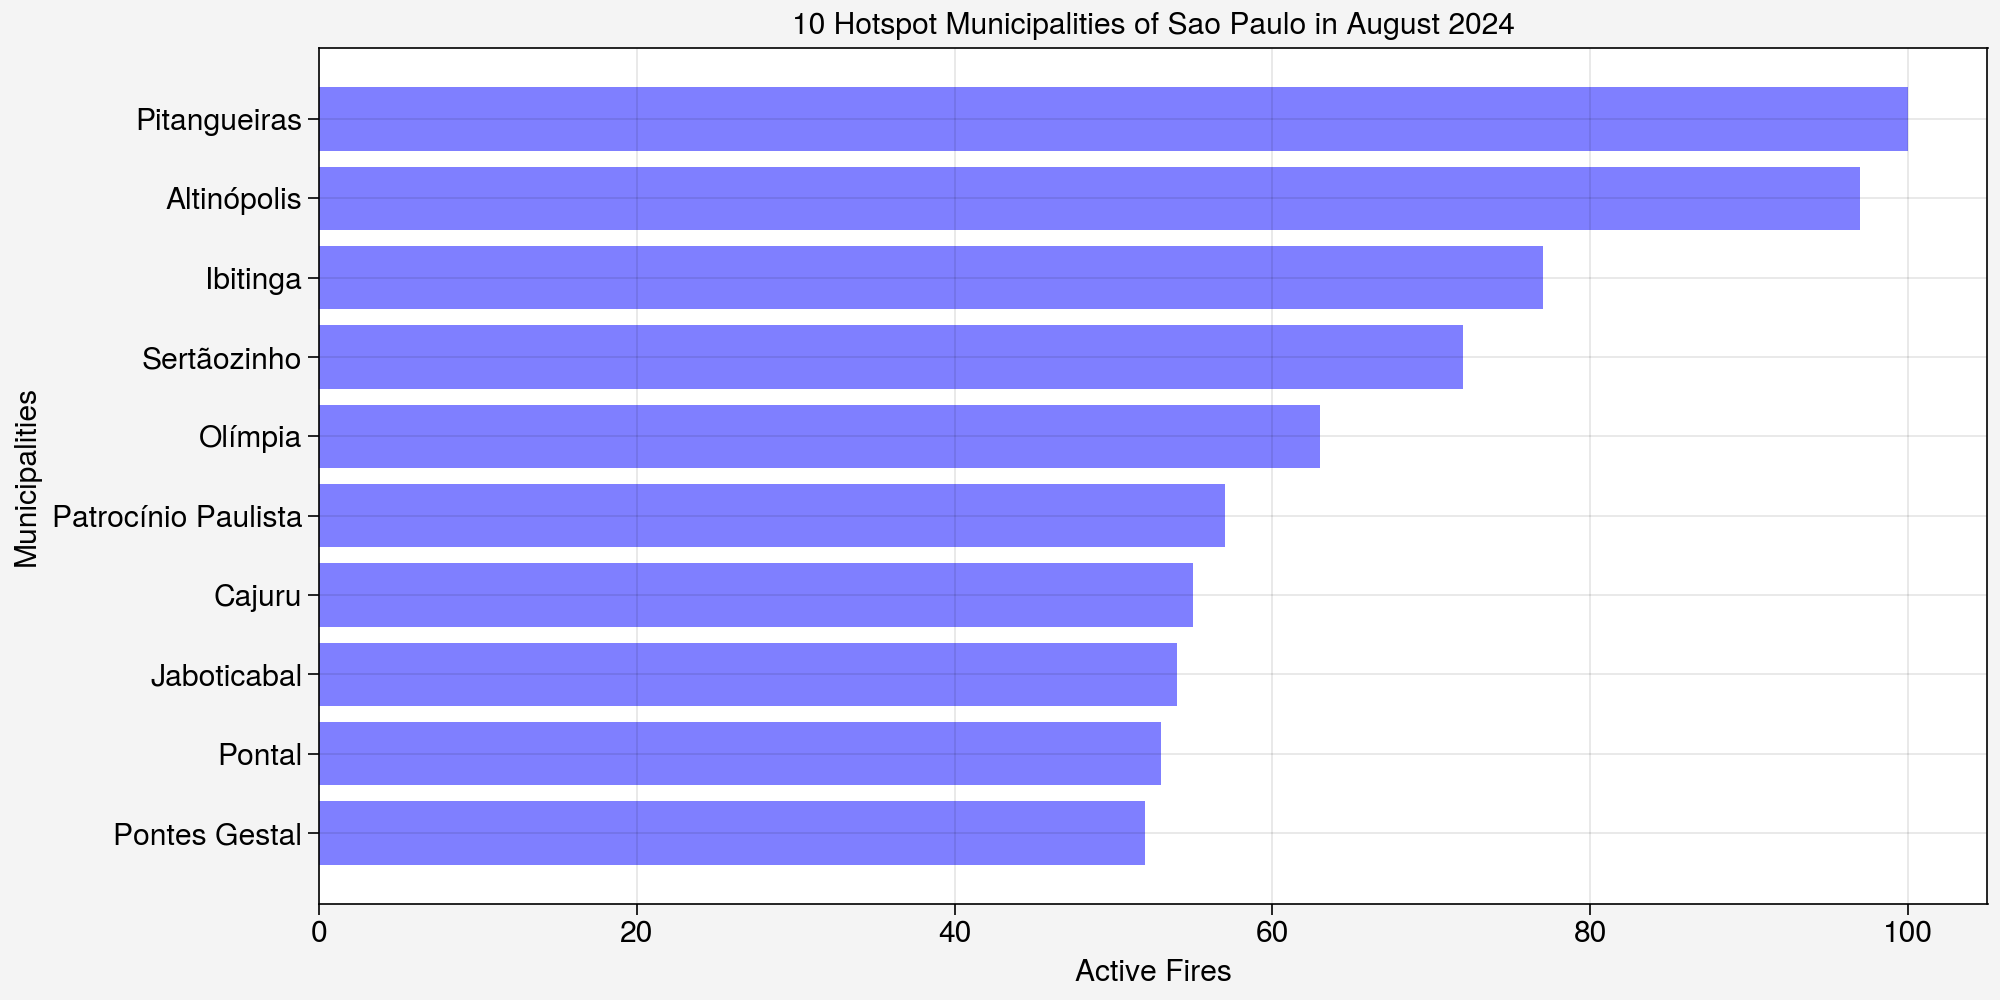

In [40]:
# importa bibliotecas
import proplot as pplt
import warnings
warnings.filterwarnings("ignore")

# seleciona os dados de agosto de 2024
df_total_2024 = df_total.loc['2024-08']

# seleciona SP
df_total_2024 = df_total_2024[ df_total_2024['estado'] == 'SÃO PAULO' ]

# nomes das cidades
cidades = df_total_2024['municipio'].value_counts(normalize=False).index[0:10].tolist()
cidades.reverse()

# coloca a primeira letra das palavra em maiúsculo
cidades = [i.title() for i in cidades]

# quantidade de focos de calor por cidade
valores = df_total_2024['municipio'].value_counts(normalize=False).values[0:10].tolist() 
valores.reverse()

# cria moldura da figura
fig, ax = pplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de barras
ax.barh(cidades,
        valores,
        color='blue',
        alpha=0.5)

# formatação do eixo
ax.format(title='10 Hotspot Municipalities of Sao Paulo in August 2024',
          ylabel='Municipalities',
          xlabel='Active Fires',
          small='15px',
          large='15px',
          xtickminor=False,
          ytickminor=False)

# salva figura
fig.save(f'output/02_figuras_focos/Fig_14_5hotspot_cidades_sp_ago2024.jpg', dpi=300)

# exibe figura na tela
pplt.show()